### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import and read the charity_data.csv. 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [2]:
# Drop the non-beneficial ID columns, 'EIN' 
application_df = application_df.drop(["EIN"], axis=1)
application_df.head()

NAME APPLICATION_TYPE  \
0              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [3]:
# Look at NAME value counts for binning
name_vc = application_df.NAME.value_counts()
#  Name counts over 10
name_vc[name_vc>10]

PARENT BOOSTER USA INC                                                    1260
TOPS CLUB INC                                                              765
UNITED STATES BOWLING CONGRESS INC                                         700
WASHINGTON STATE UNIVERSITY                                                492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                            408
                                                                          ... 
USA SWIMMING INC                                                            11
SIGMA ALPHA OMEGA CHRISTIAN SORORITY INC                                    11
SOCIETY FOR PRESERVATION & ENCOURMT OF BARBERSHOP QUARTET SINGING AMER      11
SONS OF ITALY IN AMERICA                                                    11
FELLOWSHIP OF CHRISTIAN COWBOYS INC                                         11
Name: NAME, Length: 204, dtype: int64

<AxesSubplot:ylabel='Density'>

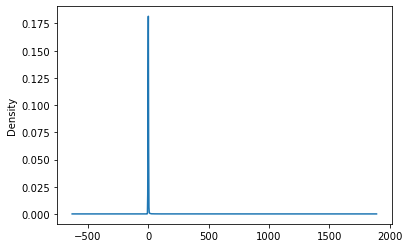

In [4]:
# Visualize the value counts of NAME
name_vc.plot.density()

In [5]:
# Determine which values to replace if counts are less than ...?
replace_name = name_vc[name_vc <= 10].index

# Replace in dataframe
for name in replace_name:
    application_df.NAME = application_df.NAME.replace(name,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                                                     21202
PARENT BOOSTER USA INC                                                     1260
TOPS CLUB INC                                                               765
UNITED STATES BOWLING CONGRESS INC                                          700
WASHINGTON STATE UNIVERSITY                                                 492
                                                                          ...  
AMERICAN POSTAL WORKERS UNION                                                11
SOCIETY FOR PRESERVATION & ENCOURMT OF BARBERSHOP QUARTET SINGING AMER       11
SIGMA ALPHA OMEGA CHRISTIAN SORORITY INC                                     11
FINANCIAL PLANNING ASSOCIATION                                               11
SLOW FOOD U S A INC                                                          11
Name: NAME, Length: 205, dtype: int64

In [6]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                       205
APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
app_vc = application_df.APPLICATION_TYPE.value_counts()
app_vc

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

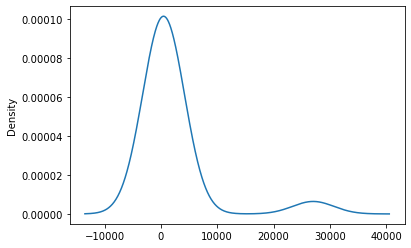

In [8]:
# Visualize the value counts of APPLICATION_TYPE
app_vc.plot.density()

In [9]:
# Determine which values to replace if counts are less than ...?
replace_application = app_vc[app_vc < 400].index

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                       205
APPLICATION_TYPE             9
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [11]:
# Look at APPLICATION_TYPE value counts for binning
app_vc = application_df.APPLICATION_TYPE.value_counts()
app_vc

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

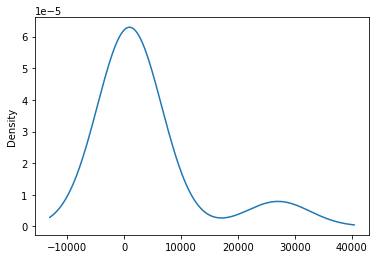

In [12]:
# Visualize the value counts of APPLICATION_TYPE
app_vc.plot.density()

In [13]:
# Determine which values to replace if counts are less than ...?
replace_application = app_vc[app_vc < 400].index

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [14]:
# Look at CLASSIFICATION value counts for binning
class_vc = application_df.CLASSIFICATION.value_counts()

<AxesSubplot:ylabel='Density'>

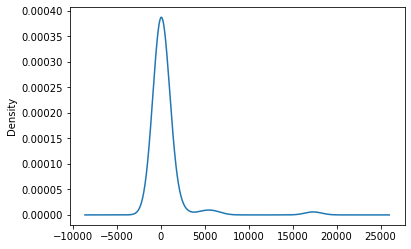

In [15]:
# Visualize the value counts of CLASSIFICATION
class_vc.plot.density()

In [16]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_vc[class_vc < 1200].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [17]:
# Generate our categorical variable lists
app_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [18]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[app_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(app_cat)
encode_df.head()

/Users/jonahrahn/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


NAME_ACE MENTOR PROGRAM OF AMERICA INC  NAME_AIR FORCE ASSOCIATION  \
0                                     0.0                         0.0   
1                                     0.0                         0.0   
2                                     0.0                         0.0   
3                                     0.0                         0.0   
4                                     0.0                         0.0   

   NAME_ALABAMA FEDERATION OF WOMENS CLUBS  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   NAME_ALABAMA TREASURE FOREST ASSOCIATION  NAME_ALPHA PHI SIGMA  \
0                                       0.0                   0.0   
1                                       0.0                   0.0   
2                                       0.0                   0.0   
3                                       0.0                   0.0   
4                                       0.0                   0.0   

   NAME_ALPHA PHI SIGMA INC  NAME_ALTRUSA INTERNATIONAL FOUNDATION INC  \
0                       0.0                                        0.0   
1                       0.0                                        0.0   
2                       0.0                                        0.0   
3                       0.0                                        0.0   
4                       0.0                                        0.0   

   NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   NAME_AMERICAN ART THERAPY ASSOCIATION INC  ...  INCOME_AMT_1-9999  \
0                                        0.0  ...                0.0   
1                                        0.0  ...                1.0   
2                                        0.0  ...                0.0   
3                                        0.0  ...                0.0   
4                                        0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 246 columns

In [19]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(app_cat,1)
application_df.head()

/Users/jonahrahn/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


STATUS  ASK_AMT  IS_SUCCESSFUL  NAME_ACE MENTOR PROGRAM OF AMERICA INC  \
0       1     5000              1                                     0.0   
1       1   108590              1                                     0.0   
2       1     5000              0                                     0.0   
3       1     6692              1                                     0.0   
4       1   142590              1                                     0.0   

   NAME_AIR FORCE ASSOCIATION  NAME_ALABAMA FEDERATION OF WOMENS CLUBS  \
0                         0.0                                      0.0   
1                         0.0                                      0.0   
2                         0.0                                      0.0   
3                         0.0                                      0.0   
4                         0.0                                      0.0   

   NAME_ALABAMA TREASURE FOREST ASSOCIATION  NAME_ALPHA PHI SIGMA  \
0                                       0.0                   0.0   
1                                       0.0                   0.0   
2                                       0.0                   0.0   
3                                       0.0                   0.0   
4                                       0.0                   0.0   

   NAME_ALPHA PHI SIGMA INC  NAME_ALTRUSA INTERNATIONAL FOUNDATION INC  ...  \
0                       0.0                                        0.0  ...   
1                       0.0                                        0.0  ...   
2                       0.0                                        0.0  ...   
3                       0.0                                        0.0  ...   
4                       0.0                                        0.0  ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                       1.0   
4              0.0                0.0                       1.0   

   SPECIAL_CONSIDERATIONS_Y  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 249 columns]

In [20]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(["IS_SUCCESSFUL"],1).values 
y = application_df["IS_SUCCESSFUL"].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=77)


/Users/jonahrahn/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [21]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 400
hidden_nodes_layer2 = 40
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               99600     
_________________________________________________________________
dense_1 (Dense)              (None, 40)                16040     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                410       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 116,061
Trainable params: 116,061
Non-trainable params: 0
_________________________________________________________________


2022-03-05 17:31:11.581960: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-05 17:31:11.582807: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [23]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [26]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/opt_weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
custom_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

#Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50, callbacks =[custom_callback])

Train on 25724 samples
Epoch 1/50

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5
   32/25724 [..............................] - ETA: 55s - loss: 0.7767 - accuracy: 0.4062
Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5
  192/25724 [..............................] - ETA: 16s - loss: 0.7342 - accuracy: 0.4479
Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5
  352/25724 [..............................] - ETA: 13s - loss: 0.7176 - accuracy: 0.4631
Epoch 00001: sav

 3264/25724 [==>...........................] - ETA: 8s - loss: 0.6034 - accuracy: 0.6912
Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5
 3424/25724 [==>...........................] - ETA: 8s - loss: 0.5981 - accuracy: 0.6963
Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5
 3584/25724 [===>..........................] - ETA: 8s - loss: 0.5954 - accuracy: 0.6981
Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.


Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5
 6624/25724 [======>.......................] - ETA: 6s - loss: 0.5479 - accuracy: 0.7376
Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5
 6784/25724 [======>.......................] - ETA: 6s - loss: 0.5466 - accuracy: 0.7382
Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5
 6944/25724 [=======>......................] - ETA: 6s - loss: 0.5449 - accuracy


Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5
 9984/25724 [==========>...................] - ETA: 5s - loss: 0.5287 - accuracy: 0.7487
Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5
10144/25724 [==========>...................] - ETA: 5s - loss: 0.5277 - accuracy: 0.7491
Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: savi

13152/25724 [==============>...............] - ETA: 4s - loss: 0.5163 - accuracy: 0.7571
Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5
13312/25724 [==============>...............] - ETA: 4s - loss: 0.5167 - accuracy: 0.7566
Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5
13472/25724 [==============>...............] - ETA: 4s - loss: 0.5167 - accuracy: 0.7565
Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.


Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5
16480/25724 [==================>...........] - ETA: 3s - loss: 0.5092 - accuracy: 0.7609
Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5
16640/25724 [==================>...........] - ETA: 3s - loss: 0.5094 - accuracy: 0.7603
Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5
16800/25724 [==================>...........] - ETA: 3s - loss: 0.5089 - accuracy: 0.7608
Epoch 00001: saving model to checkpoints/opt_weights.


Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5
19840/25724 [======================>.......] - ETA: 2s - loss: 0.5044 - accuracy: 0.7629
Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5
20000/25724 [======================>.......] - ETA: 2s - loss: 0.5043 - accuracy: 0.7629
Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5
20160/25724 [=====

23040/25724 [=========================>....] - ETA: 0s - loss: 0.4998 - accuracy: 0.7658
Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5
23200/25724 [==========================>...] - ETA: 0s - loss: 0.4997 - accuracy: 0.7657
Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5
23296/25724 [==========================>...] - ETA: 0s - loss: 0.4997 - accuracy: 0.7656
Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.01.hdf5

Epoch 00001: saving model to checkpoints/opt_weights.


Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5
  512/25724 [..............................] - ETA: 8s - loss: 0.4417 - accuracy: 0.8105
Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5
  672/25724 [..............................] - ETA: 8s - loss: 0.4434 - accuracy: 0.8095
Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5
  736/25724 [..............................] - ETA: 10s - loss: 0.4423 - accuracy: 0.8084
Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5
  768/25724 [..............................] - ETA: 12s - loss: 0.4402 - accuracy: 0.8099
Epoch 00002: saving model


Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5
 3648/25724 [===>..........................] - ETA: 9s - loss: 0.4609 - accuracy: 0.7895 
Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5
 3808/25724 [===>..........................] - ETA: 9s - loss: 0.4589 - accuracy: 0.7912
Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5
 3968/25724 [===>..........................] - ETA: 9s - loss: 0.4589 - accurac


Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5
 7008/25724 [=======>......................] - ETA: 7s - loss: 0.4528 - accuracy: 0.7935
Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5
 7168/25724 [=======>......................] - ETA: 7s - loss: 0.4540 - accuracy: 0.7924
Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: savi

10208/25724 [==========>...................] - ETA: 5s - loss: 0.4574 - accuracy: 0.7875
Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5
10368/25724 [===========>..................] - ETA: 5s - loss: 0.4578 - accuracy: 0.7875
Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5
10528/25724 [===========>..................] - ETA: 5s - loss: 0.4586 - accuracy: 0.7867
Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.


Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5
13568/25724 [==============>...............] - ETA: 4s - loss: 0.4595 - accuracy: 0.7852
Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5
13728/25724 [===============>..............] - ETA: 4s - loss: 0.4598 - accuracy: 0.7846
Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5
13888/25724 [===============>..............] - ETA: 4s - loss: 0.4596 - accuracy

16800/25724 [==================>...........] - ETA: 3s - loss: 0.4625 - accuracy: 0.7823
Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5
16960/25724 [==================>...........] - ETA: 3s - loss: 0.4625 - accuracy: 0.7821
Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5
17120/25724 [==================>...........] - ETA: 3s - loss: 0.4619 - accuracy: 0.7826
Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.

20096/25724 [======================>.......] - ETA: 2s - loss: 0.4639 - accuracy: 0.7799
Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5
20256/25724 [======================>.......] - ETA: 2s - loss: 0.4636 - accuracy: 0.7803
Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5
20352/25724 [======================>.......] - ETA: 1s - loss: 0.4636 - accuracy: 0.7804
Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.

23360/25724 [==========================>...] - ETA: 0s - loss: 0.4610 - accuracy: 0.7815
Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5
23520/25724 [==========================>...] - ETA: 0s - loss: 0.4605 - accuracy: 0.7818
Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.4604 - accuracy: 0.7820
Epoch 00002: saving model to checkpoints/opt_weights.02.hdf5

Epoch 00002: saving model to checkpoints/opt_weights.


Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5
  928/25724 [>.............................] - ETA: 9s - loss: 0.4364 - accuracy: 0.7996
Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5
 1088/25724 [>.............................] - ETA: 9s - loss: 0.4331 - accuracy: 0.8042
Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5
 1248/25724 [>.............................] - ETA: 9s - loss: 0.4323 - accuracy


Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5
 4224/25724 [===>..........................] - ETA: 7s - loss: 0.4464 - accuracy: 0.7876
Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5
 4384/25724 [====>.........................] - ETA: 7s - loss: 0.4467 - accuracy: 0.7879
Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5
 4544/25724 [====>.........................] - ETA: 7s - loss: 0.4461 - accuracy


Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5
 7584/25724 [=======>......................] - ETA: 6s - loss: 0.4445 - accuracy: 0.7915
Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5
 7744/25724 [========>.....................] - ETA: 6s - loss: 0.4448 - accuracy: 0.7916
Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: savi

10784/25724 [===========>..................] - ETA: 5s - loss: 0.4504 - accuracy: 0.7874
Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5
10944/25724 [===========>..................] - ETA: 5s - loss: 0.4507 - accuracy: 0.7868
Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5
11104/25724 [===========>..................] - ETA: 5s - loss: 0.4499 - accuracy: 0.7872
Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.

14048/25724 [===============>..............] - ETA: 4s - loss: 0.4532 - accuracy: 0.7840
Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5
14208/25724 [===============>..............] - ETA: 4s - loss: 0.4536 - accuracy: 0.7836
Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5
14368/25724 [===============>..............] - ETA: 3s - loss: 0.4546 - accuracy: 0.7831
Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.


Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5
17408/25724 [===================>..........] - ETA: 2s - loss: 0.4560 - accuracy: 0.7818
Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5
17568/25724 [===================>..........] - ETA: 2s - loss: 0.4559 - accuracy: 0.7816
Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5
17728/25724 [===================>..........] - ETA: 2s - loss: 0.4551 - accuracy


Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5
20672/25724 [=======================>......] - ETA: 1s - loss: 0.4543 - accuracy: 0.7833
Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5
20832/25724 [=======================>......] - ETA: 1s - loss: 0.4539 - accuracy: 0.7835
Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5
20992/25724 [=======================>......] - ETA: 1s - loss: 0.4538 - accuracy: 0.7835
Epoch 00003: saving model to checkpoints/opt_weights.


Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5
23968/25724 [==========================>...] - ETA: 0s - loss: 0.4515 - accuracy: 0.7841
Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5
24128/25724 [===========================>..] - ETA: 0s - loss: 0.4514 - accuracy: 0.7842
Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5

Epoch 00003: saving model to checkpoints/opt_weights.03.hdf5
24288/25724 [=====


Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5
 1472/25724 [>.............................] - ETA: 8s - loss: 0.4392 - accuracy: 0.7860
Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5
 1632/25724 [>.............................] - ETA: 8s - loss: 0.4379 - accuracy: 0.7886
Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5
 1792/25724 [=>...

 4672/25724 [====>.........................] - ETA: 7s - loss: 0.4398 - accuracy: 0.7851
Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5
 4832/25724 [====>.........................] - ETA: 7s - loss: 0.4416 - accuracy: 0.7835
Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5
 4960/25724 [====>.........................] - ETA: 7s - loss: 0.4422 - accuracy: 0.7841
Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.


Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5
 8000/25724 [========>.....................] - ETA: 6s - loss: 0.4462 - accuracy: 0.7843
Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5
 8160/25724 [========>.....................] - ETA: 6s - loss: 0.4459 - accuracy: 0.7842
Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5
 8320/25724 [========>.....................] - ETA: 6s - loss: 0.4461 - accuracy: 0.7838
Epoch 00004: saving model to checkpoints/opt_weights.


Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5
11360/25724 [============>.................] - ETA: 4s - loss: 0.4462 - accuracy: 0.7835
Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5
11520/25724 [============>.................] - ETA: 4s - loss: 0.4467 - accuracy: 0.7831
Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5
11680/25724 [=====

14560/25724 [===============>..............] - ETA: 3s - loss: 0.4440 - accuracy: 0.7852
Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5
14720/25724 [================>.............] - ETA: 3s - loss: 0.4436 - accuracy: 0.7852
Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5
14880/25724 [================>.............] - ETA: 3s - loss: 0.4432 - accuracy: 0.7856
Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.


Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5
17888/25724 [===================>..........] - ETA: 2s - loss: 0.4434 - accuracy: 0.7868
Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5
18048/25724 [====================>.........] - ETA: 2s - loss: 0.4435 - accuracy: 0.7867
Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5
18208/25724 [=====

21088/25724 [=======================>......] - ETA: 1s - loss: 0.4435 - accuracy: 0.7867
Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5
21248/25724 [=======================>......] - ETA: 1s - loss: 0.4437 - accuracy: 0.7866
Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5
21408/25724 [=======================>......] - ETA: 1s - loss: 0.4436 - accuracy: 0.7868
Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.


Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5
24416/25724 [===========================>..] - ETA: 0s - loss: 0.4460 - accuracy: 0.7857
Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.4461 - accuracy: 0.7858
Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5

Epoch 00004: saving model to checkpoints/opt_weights.04.hdf5
24736/25724 [===========================>..] - ETA: 0s - loss: 0.4465 - accuracy: 0.7855
Epoch 00004: saving model to checkpoints/opt_weights.


Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5
 1920/25724 [=>............................] - ETA: 8s - loss: 0.4427 - accuracy: 0.7859
Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5
 2080/25724 [=>............................] - ETA: 8s - loss: 0.4421 - accuracy: 0.7865
Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5
 2176/25724 [=>............................] - ETA: 8s - loss: 0.4415 - accuracy: 0.7868
Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.


Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5
 5248/25724 [=====>........................] - ETA: 7s - loss: 0.4401 - accuracy: 0.7877
Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5
 5408/25724 [=====>........................] - ETA: 7s - loss: 0.4433 - accuracy: 0.7859
Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5
 5568/25724 [=====>........................] - ETA: 7s - loss: 0.4424 - accuracy


Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5
 8608/25724 [=========>....................] - ETA: 5s - loss: 0.4483 - accuracy: 0.7817
Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5
 8768/25724 [=========>....................] - ETA: 5s - loss: 0.4476 - accuracy: 0.7820
Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5
 8896/25724 [=====


Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5
11904/25724 [============>.................] - ETA: 4s - loss: 0.4422 - accuracy: 0.7865
Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5
12064/25724 [=============>................] - ETA: 4s - loss: 0.4426 - accuracy: 0.7861
Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: savi


Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5
15200/25724 [================>.............] - ETA: 3s - loss: 0.4455 - accuracy: 0.7847
Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5
15360/25724 [================>.............] - ETA: 3s - loss: 0.4455 - accuracy: 0.7844
Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: savi


Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5
18464/25724 [====================>.........] - ETA: 2s - loss: 0.4465 - accuracy: 0.7837
Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5
18624/25724 [====================>.........] - ETA: 2s - loss: 0.4464 - accuracy: 0.7837
Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5
18784/25724 [=====


Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5
21792/25724 [========================>.....] - ETA: 1s - loss: 0.4452 - accuracy: 0.7846
Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5
21952/25724 [========================>.....] - ETA: 1s - loss: 0.4448 - accuracy: 0.7848
Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: savi


Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5
25088/25724 [============================>.] - ETA: 0s - loss: 0.4448 - accuracy: 0.7852
Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.4451 - accuracy: 0.7851
Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: saving model to checkpoints/opt_weights.05.hdf5

Epoch 00005: savi


Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5
 2592/25724 [==>...........................] - ETA: 7s - loss: 0.4390 - accuracy: 0.7870
Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5
 2752/25724 [==>...........................] - ETA: 7s - loss: 0.4421 - accuracy: 0.7860
Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5
 2912/25724 [==>...........................] - ETA: 7s - loss: 0.4451 - accuracy


Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5
 5856/25724 [=====>........................] - ETA: 6s - loss: 0.4363 - accuracy: 0.7935
Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5
 6016/25724 [======>.......................] - ETA: 6s - loss: 0.4356 - accuracy: 0.7940
Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5
 6176/25724 [======>.......................] - ETA: 6s - loss: 0.4376 - accuracy: 0.7924
Epoch 00006: saving model to checkpoints/opt_weights.


Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5
 9184/25724 [=========>....................] - ETA: 5s - loss: 0.4398 - accuracy: 0.7897
Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5
 9344/25724 [=========>....................] - ETA: 5s - loss: 0.4408 - accuracy: 0.7893
Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5
 9504/25724 [==========>...................] - ETA: 5s - loss: 0.4407 - accuracy


Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5
12544/25724 [=============>................] - ETA: 4s - loss: 0.4412 - accuracy: 0.7887
Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5
12704/25724 [=============>................] - ETA: 4s - loss: 0.4413 - accuracy: 0.7885
Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: savi


Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5
15776/25724 [=================>............] - ETA: 3s - loss: 0.4407 - accuracy: 0.7882
Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5
15936/25724 [=================>............] - ETA: 3s - loss: 0.4408 - accuracy: 0.7882
Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5
16096/25724 [=================>............] - ETA: 3s - loss: 0.4407 - accuracy: 0.7880
Epoch 00006: saving model to checkpoints/opt_weights.


Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5
19072/25724 [=====================>........] - ETA: 2s - loss: 0.4416 - accuracy: 0.7871
Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5
19232/25724 [=====================>........] - ETA: 2s - loss: 0.4415 - accuracy: 0.7873
Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5
19392/25724 [=====


Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5
22368/25724 [=========================>....] - ETA: 1s - loss: 0.4420 - accuracy: 0.7870
Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5
22528/25724 [=========================>....] - ETA: 1s - loss: 0.4417 - accuracy: 0.7875
Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5
22688/25724 [=====


Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5
25664/25724 [============================>.] - ETA: 0s - loss: 0.4428 - accuracy: 0.7868
Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5

Epoch 00006: saving model to checkpoints/opt_weights.06.hdf5
25724/25724 [==============================] - 9s 356us/sample - loss: 0.4432 - accuracy: 0.7865
Epoch 7/50

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5
   32/25724 [..............................] - ETA: 10s - loss: 0.4119 - accuracy: 0.8125
Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5
  192/25724 [....................

 3072/25724 [==>...........................] - ETA: 7s - loss: 0.4315 - accuracy: 0.7949
Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5
 3232/25724 [==>...........................] - ETA: 7s - loss: 0.4324 - accuracy: 0.7933
Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5
 3392/25724 [==>...........................] - ETA: 7s - loss: 0.4322 - accuracy: 0.7930
Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.

 6368/25724 [======>.......................] - ETA: 6s - loss: 0.4381 - accuracy: 0.7864
Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5
 6528/25724 [======>.......................] - ETA: 6s - loss: 0.4378 - accuracy: 0.7866
Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5
 6688/25724 [======>.......................] - ETA: 6s - loss: 0.4379 - accuracy: 0.7865
Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.


Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5
 9728/25724 [==========>...................] - ETA: 5s - loss: 0.4387 - accuracy: 0.7881
Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5
 9888/25724 [==========>...................] - ETA: 5s - loss: 0.4389 - accuracy: 0.7875
Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5
10048/25724 [==========>...................] - ETA: 5s - loss: 0.4389 - accuracy


Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5
13088/25724 [==============>...............] - ETA: 4s - loss: 0.4392 - accuracy: 0.7877
Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5
13248/25724 [==============>...............] - ETA: 4s - loss: 0.4401 - accuracy: 0.7875
Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: savi

16288/25724 [=================>............] - ETA: 3s - loss: 0.4416 - accuracy: 0.7882
Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5
16448/25724 [==================>...........] - ETA: 3s - loss: 0.4408 - accuracy: 0.7885
Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5
16608/25724 [==================>...........] - ETA: 3s - loss: 0.4412 - accuracy: 0.7888
Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.


Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5
19648/25724 [=====================>........] - ETA: 2s - loss: 0.4416 - accuracy: 0.7876
Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5
19808/25724 [======================>.......] - ETA: 2s - loss: 0.4421 - accuracy: 0.7872
Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5
19968/25724 [======================>.......] - ETA: 2s - loss: 0.4422 - accuracy


Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5
22944/25724 [=========================>....] - ETA: 0s - loss: 0.4412 - accuracy: 0.7880
Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5
23104/25724 [=========================>....] - ETA: 0s - loss: 0.4412 - accuracy: 0.7881
Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5

Epoch 00007: saving model to checkpoints/opt_weights.07.hdf5
23264/25724 [==========================>...] - ETA: 0s - loss: 0.4412 - accuracy


Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5
  512/25724 [..............................] - ETA: 8s - loss: 0.4757 - accuracy: 0.7559
Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5
  672/25724 [..............................] - ETA: 8s - loss: 0.4575 - accuracy: 0.7768
Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: savi

 3712/25724 [===>..........................] - ETA: 7s - loss: 0.4455 - accuracy: 0.7815
Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5
 3872/25724 [===>..........................] - ETA: 7s - loss: 0.4470 - accuracy: 0.7807
Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5
 4032/25724 [===>..........................] - ETA: 7s - loss: 0.4476 - accuracy: 0.7808
Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.

 7008/25724 [=======>......................] - ETA: 6s - loss: 0.4479 - accuracy: 0.7814
Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5
 7136/25724 [=======>......................] - ETA: 6s - loss: 0.4496 - accuracy: 0.7797
Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5
 7296/25724 [=======>......................] - ETA: 6s - loss: 0.4482 - accuracy: 0.7806
Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.

10272/25724 [==========>...................] - ETA: 5s - loss: 0.4458 - accuracy: 0.7819
Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5
10432/25724 [===========>..................] - ETA: 5s - loss: 0.4462 - accuracy: 0.7821
Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5
10592/25724 [===========>..................] - ETA: 5s - loss: 0.4462 - accuracy: 0.7821
Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.

13568/25724 [==============>...............] - ETA: 4s - loss: 0.4448 - accuracy: 0.7838
Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5
13728/25724 [===============>..............] - ETA: 4s - loss: 0.4450 - accuracy: 0.7837
Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5
13888/25724 [===============>..............] - ETA: 4s - loss: 0.4451 - accuracy: 0.7836
Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.


Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5
16896/25724 [==================>...........] - ETA: 3s - loss: 0.4438 - accuracy: 0.7848
Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5
17056/25724 [==================>...........] - ETA: 3s - loss: 0.4433 - accuracy: 0.7852
Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5
17216/25724 [===================>..........] - ETA: 3s - loss: 0.4430 - accuracy: 0.7857
Epoch 00008: saving model to checkpoints/opt_weights.


Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5
20256/25724 [======================>.......] - ETA: 1s - loss: 0.4427 - accuracy: 0.7860
Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5
20416/25724 [======================>.......] - ETA: 1s - loss: 0.4428 - accuracy: 0.7859
Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5
20576/25724 [======================>.......] - ETA: 1s - loss: 0.4421 - accuracy

23488/25724 [==========================>...] - ETA: 0s - loss: 0.4406 - accuracy: 0.7879
Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5
23648/25724 [==========================>...] - ETA: 0s - loss: 0.4411 - accuracy: 0.7875
Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5
23808/25724 [==========================>...] - ETA: 0s - loss: 0.4406 - accuracy: 0.7880
Epoch 00008: saving model to checkpoints/opt_weights.08.hdf5

Epoch 00008: saving model to checkpoints/opt_weights.

  992/25724 [>.............................] - ETA: 8s - loss: 0.4490 - accuracy: 0.7762
Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5
 1152/25724 [>.............................] - ETA: 8s - loss: 0.4474 - accuracy: 0.7743
Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5
 1312/25724 [>.............................] - ETA: 8s - loss: 0.4385 - accuracy: 0.7843
Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.

 4288/25724 [====>.........................] - ETA: 7s - loss: 0.4350 - accuracy: 0.7882
Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5
 4448/25724 [====>.........................] - ETA: 7s - loss: 0.4369 - accuracy: 0.7869
Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5
 4608/25724 [====>.........................] - ETA: 7s - loss: 0.4361 - accuracy: 0.7880
Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.


Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5
 7616/25724 [=======>......................] - ETA: 6s - loss: 0.4358 - accuracy: 0.7887
Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5
 7776/25724 [========>.....................] - ETA: 6s - loss: 0.4367 - accuracy: 0.7879
Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5
 7936/25724 [========>.....................] - ETA: 6s - loss: 0.4372 - accuracy: 0.7878
Epoch 00009: saving model to checkpoints/opt_weights.

10848/25724 [===========>..................] - ETA: 5s - loss: 0.4384 - accuracy: 0.7888
Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5
11008/25724 [===========>..................] - ETA: 5s - loss: 0.4386 - accuracy: 0.7885
Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5
11168/25724 [============>.................] - ETA: 5s - loss: 0.4388 - accuracy: 0.7882
Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.


Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5
14176/25724 [===============>..............] - ETA: 4s - loss: 0.4385 - accuracy: 0.7878
Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5
14336/25724 [===============>..............] - ETA: 3s - loss: 0.4380 - accuracy: 0.7884
Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5
14496/25724 [===============>..............] - ETA: 3s - loss: 0.4381 - accuracy: 0.7881
Epoch 00009: saving model to checkpoints/opt_weights.


Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5
17536/25724 [===================>..........] - ETA: 2s - loss: 0.4379 - accuracy: 0.7872
Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5
17696/25724 [===================>..........] - ETA: 2s - loss: 0.4373 - accuracy: 0.7877
Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5
17856/25724 [=====


Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5
20832/25724 [=======================>......] - ETA: 1s - loss: 0.4399 - accuracy: 0.7857
Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5
20960/25724 [=======================>......] - ETA: 1s - loss: 0.4402 - accuracy: 0.7855
Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5
21120/25724 [=======================>......] - ETA: 1s - loss: 0.4402 - accuracy


Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.4394 - accuracy: 0.7864
Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.4393 - accuracy: 0.7864
Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: saving model to checkpoints/opt_weights.09.hdf5

Epoch 00009: savi


Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5
 1664/25724 [>.............................] - ETA: 22s - loss: 0.4448 - accuracy: 0.7867
Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5
 1824/25724 [=>............................] - ETA: 20s - loss: 0.4509 - accuracy: 0.7834
Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5
 1984/25724 [=>............................] - ETA: 19s - loss: 0.4504 - accur


Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5
 4960/25724 [====>.........................] - ETA: 11s - loss: 0.4390 - accuracy: 0.7889
Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5
 5120/25724 [====>.........................] - ETA: 11s - loss: 0.4405 - accuracy: 0.7879
Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5
 5280/25724 [===

 8160/25724 [========>.....................] - ETA: 8s - loss: 0.4405 - accuracy: 0.7880
Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5
 8320/25724 [========>.....................] - ETA: 8s - loss: 0.4405 - accuracy: 0.7882
Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5
 8480/25724 [========>.....................] - ETA: 8s - loss: 0.4395 - accuracy: 0.7890
Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.


Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5
11520/25724 [============>.................] - ETA: 6s - loss: 0.4379 - accuracy: 0.7909
Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5
11680/25724 [============>.................] - ETA: 6s - loss: 0.4379 - accuracy: 0.7907
Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5
11840/25724 [============>.................] - ETA: 6s - loss: 0.4380 - accuracy


Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5
14880/25724 [================>.............] - ETA: 4s - loss: 0.4383 - accuracy: 0.7905
Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5
15040/25724 [================>.............] - ETA: 4s - loss: 0.4380 - accuracy: 0.7906
Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: savi


Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5
18176/25724 [====================>.........] - ETA: 3s - loss: 0.4378 - accuracy: 0.7904
Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5
18336/25724 [====================>.........] - ETA: 2s - loss: 0.4375 - accuracy: 0.7907
Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: savi

21376/25724 [=======================>......] - ETA: 1s - loss: 0.4371 - accuracy: 0.7906
Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5
21536/25724 [========================>.....] - ETA: 1s - loss: 0.4367 - accuracy: 0.7909
Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5
21696/25724 [========================>.....] - ETA: 1s - loss: 0.4368 - accuracy: 0.7907
Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.


Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5
24736/25724 [===========================>..] - ETA: 0s - loss: 0.4386 - accuracy: 0.7889
Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5
24896/25724 [============================>.] - ETA: 0s - loss: 0.4389 - accuracy: 0.7888
Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5

Epoch 00010: saving model to checkpoints/opt_weights.10.hdf5
25056/25724 [============================>.] - ETA: 0s - loss: 0.4392 - accuracy


Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5
 2240/25724 [=>............................] - ETA: 8s - loss: 0.4206 - accuracy: 0.7960
Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5
 2400/25724 [=>............................] - ETA: 8s - loss: 0.4224 - accuracy: 0.7954
Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5
 2560/25724 [=>............................] - ETA: 8s - loss: 0.4236 - accuracy

 5408/25724 [=====>........................] - ETA: 7s - loss: 0.4297 - accuracy: 0.7944
Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5
 5568/25724 [=====>........................] - ETA: 7s - loss: 0.4292 - accuracy: 0.7949
Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5
 5728/25724 [=====>........................] - ETA: 7s - loss: 0.4284 - accuracy: 0.7957
Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.

 8736/25724 [=========>....................] - ETA: 6s - loss: 0.4289 - accuracy: 0.7949
Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5
 8896/25724 [=========>....................] - ETA: 6s - loss: 0.4294 - accuracy: 0.7944
Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5
 9056/25724 [=========>....................] - ETA: 6s - loss: 0.4302 - accuracy: 0.7943
Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.

12032/25724 [=============>................] - ETA: 4s - loss: 0.4339 - accuracy: 0.7901
Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5
12192/25724 [=============>................] - ETA: 4s - loss: 0.4334 - accuracy: 0.7907
Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5
12352/25724 [=============>................] - ETA: 4s - loss: 0.4330 - accuracy: 0.7912
Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.


Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5
15392/25724 [================>.............] - ETA: 3s - loss: 0.4354 - accuracy: 0.7905
Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5
15552/25724 [=================>............] - ETA: 3s - loss: 0.4352 - accuracy: 0.7909
Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5
15712/25724 [=================>............] - ETA: 3s - loss: 0.4352 - accuracy: 0.7909
Epoch 00011: saving model to checkpoints/opt_weights.


Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5
18720/25724 [====================>.........] - ETA: 2s - loss: 0.4364 - accuracy: 0.7899
Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5
18880/25724 [=====================>........] - ETA: 2s - loss: 0.4371 - accuracy: 0.7896
Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5
19040/25724 [=====================>........] - ETA: 2s - loss: 0.4369 - accuracy


Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5
22080/25724 [========================>.....] - ETA: 1s - loss: 0.4376 - accuracy: 0.7887
Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5
22240/25724 [========================>.....] - ETA: 1s - loss: 0.4372 - accuracy: 0.7888
Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: savi

25280/25724 [============================>.] - ETA: 0s - loss: 0.4368 - accuracy: 0.7884
Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5
25440/25724 [============================>.] - ETA: 0s - loss: 0.4368 - accuracy: 0.7884
Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5
25600/25724 [============================>.] - ETA: 0s - loss: 0.4367 - accuracy: 0.7886
Epoch 00011: saving model to checkpoints/opt_weights.11.hdf5

Epoch 00011: saving model to checkpoints/opt_weights.


Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5
 2912/25724 [==>...........................] - ETA: 7s - loss: 0.4457 - accuracy: 0.7861
Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5
 3072/25724 [==>...........................] - ETA: 7s - loss: 0.4437 - accuracy: 0.7871
Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: savi

 6112/25724 [======>.......................] - ETA: 6s - loss: 0.4376 - accuracy: 0.7929
Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5
 6272/25724 [======>.......................] - ETA: 6s - loss: 0.4391 - accuracy: 0.7908
Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5
 6432/25724 [======>.......................] - ETA: 6s - loss: 0.4388 - accuracy: 0.7904
Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.

 9376/25724 [=========>....................] - ETA: 5s - loss: 0.4400 - accuracy: 0.7880
Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5
 9536/25724 [==========>...................] - ETA: 5s - loss: 0.4409 - accuracy: 0.7878
Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5
 9696/25724 [==========>...................] - ETA: 5s - loss: 0.4402 - accuracy: 0.7882
Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.


Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5
12736/25724 [=============>................] - ETA: 4s - loss: 0.4379 - accuracy: 0.7904
Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5
12896/25724 [==============>...............] - ETA: 4s - loss: 0.4385 - accuracy: 0.7900
Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5
13056/25724 [==============>...............] - ETA: 4s - loss: 0.4381 - accuracy


Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5
16096/25724 [=================>............] - ETA: 3s - loss: 0.4344 - accuracy: 0.7918
Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5
16256/25724 [=================>............] - ETA: 3s - loss: 0.4347 - accuracy: 0.7918
Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: savi

19296/25724 [=====================>........] - ETA: 2s - loss: 0.4343 - accuracy: 0.7915
Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5
19392/25724 [=====================>........] - ETA: 2s - loss: 0.4347 - accuracy: 0.7912
Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5
19552/25724 [=====================>........] - ETA: 2s - loss: 0.4350 - accuracy: 0.7911
Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.

22592/25724 [=========================>....] - ETA: 1s - loss: 0.4343 - accuracy: 0.7917
Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5
22752/25724 [=========================>....] - ETA: 1s - loss: 0.4346 - accuracy: 0.7915
Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5
22912/25724 [=========================>....] - ETA: 0s - loss: 0.4348 - accuracy: 0.7912
Epoch 00012: saving model to checkpoints/opt_weights.12.hdf5

Epoch 00012: saving model to checkpoints/opt_weights.


Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5
  192/25724 [..............................] - ETA: 8s - loss: 0.4676 - accuracy: 0.7708
Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5
  352/25724 [..............................] - ETA: 8s - loss: 0.4407 - accuracy: 0.7926
Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5
  512/25724 [..............................] - ETA: 8s - loss: 0.4466 - accuracy


Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5
 3552/25724 [===>..........................] - ETA: 7s - loss: 0.4373 - accuracy: 0.7931
Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5
 3712/25724 [===>..........................] - ETA: 7s - loss: 0.4354 - accuracy: 0.7947
Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: savi

 6752/25724 [======>.......................] - ETA: 6s - loss: 0.4386 - accuracy: 0.7909
Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5
 6912/25724 [=======>......................] - ETA: 6s - loss: 0.4384 - accuracy: 0.7912
Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5
 7072/25724 [=======>......................] - ETA: 6s - loss: 0.4381 - accuracy: 0.7916
Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.


Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5
10080/25724 [==========>...................] - ETA: 5s - loss: 0.4343 - accuracy: 0.7925
Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5
10240/25724 [==========>...................] - ETA: 5s - loss: 0.4351 - accuracy: 0.7913
Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5
10368/25724 [===========>..................] - ETA: 5s - loss: 0.4348 - accuracy


Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5
13184/25724 [==============>...............] - ETA: 4s - loss: 0.4321 - accuracy: 0.7920
Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5
13312/25724 [==============>...............] - ETA: 4s - loss: 0.4320 - accuracy: 0.7921
Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5
13472/25724 [==============>...............] - ETA: 4s - loss: 0.4318 - accuracy


Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5
16288/25724 [=================>............] - ETA: 3s - loss: 0.4334 - accuracy: 0.7911
Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5
16416/25724 [==================>...........] - ETA: 3s - loss: 0.4333 - accuracy: 0.7914
Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5
16576/25724 [==================>...........] - ETA: 3s - loss: 0.4338 - accuracy: 0.7909
Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.

19040/25724 [=====================>........] - ETA: 3s - loss: 0.4342 - accuracy: 0.7907
Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5
19136/25724 [=====================>........] - ETA: 3s - loss: 0.4343 - accuracy: 0.7906
Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5
19296/25724 [=====================>........] - ETA: 3s - loss: 0.4346 - accuracy: 0.7904
Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.


Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5
22304/25724 [=========================>....] - ETA: 1s - loss: 0.4361 - accuracy: 0.7890
Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5
22464/25724 [=========================>....] - ETA: 1s - loss: 0.4360 - accuracy: 0.7890
Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5
22624/25724 [=========================>....] - ETA: 1s - loss: 0.4360 - accuracy

25344/25724 [============================>.] - ETA: 0s - loss: 0.4356 - accuracy: 0.7895
Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5
25504/25724 [============================>.] - ETA: 0s - loss: 0.4353 - accuracy: 0.7895
Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5
25664/25724 [============================>.] - ETA: 0s - loss: 0.4352 - accuracy: 0.7896
Epoch 00013: saving model to checkpoints/opt_weights.13.hdf5

Epoch 00013: saving model to checkpoints/opt_weights.


Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5
 2720/25724 [==>...........................] - ETA: 11s - loss: 0.4403 - accuracy: 0.7886
Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5
 2848/25724 [==>...........................] - ETA: 11s - loss: 0.4394 - accuracy: 0.7900
Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5
 3008/25724 [==>...........................] - ETA: 11s - loss: 0.4381 - accuracy: 0.7912
Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weigh


Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5
 6048/25724 [======>.......................] - ETA: 8s - loss: 0.4376 - accuracy: 0.7892
Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5
 6208/25724 [======>.......................] - ETA: 8s - loss: 0.4367 - accuracy: 0.7903
Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: savi


Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5
 9376/25724 [=========>....................] - ETA: 6s - loss: 0.4345 - accuracy: 0.7910
Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5
 9536/25724 [==========>...................] - ETA: 6s - loss: 0.4347 - accuracy: 0.7908
Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: savi


Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5
12640/25724 [=============>................] - ETA: 5s - loss: 0.4361 - accuracy: 0.7903
Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5
12800/25724 [=============>................] - ETA: 5s - loss: 0.4352 - accuracy: 0.7909
Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5
12960/25724 [=====

15840/25724 [=================>............] - ETA: 3s - loss: 0.4370 - accuracy: 0.7907
Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5
16000/25724 [=================>............] - ETA: 3s - loss: 0.4370 - accuracy: 0.7906
Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5
16160/25724 [=================>............] - ETA: 3s - loss: 0.4375 - accuracy: 0.7902
Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.

19136/25724 [=====================>........] - ETA: 2s - loss: 0.4366 - accuracy: 0.7898
Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5
19328/25724 [=====================>........] - ETA: 2s - loss: 0.4363 - accuracy: 0.7903
Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5
19488/25724 [=====================>........] - ETA: 2s - loss: 0.4359 - accuracy: 0.7906
Epoch 00014: saving model to checkpoints/opt_weights.


Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5
22560/25724 [=========================>....] - ETA: 1s - loss: 0.4355 - accuracy: 0.7907
Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5
22720/25724 [=========================>....] - ETA: 1s - loss: 0.4348 - accuracy: 0.7913
Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5

Epoch 00014: saving model to checkpoints/opt_weights.14.hdf5
22880/25724 [=====

   32/25724 [..............................] - ETA: 8s - loss: 0.4252 - accuracy: 0.7812
Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5
  192/25724 [..............................] - ETA: 8s - loss: 0.4731 - accuracy: 0.7500
Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5
  352/25724 [..............................] - ETA: 8s - loss: 0.4831 - accuracy: 0.7472
Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.


Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5
 3456/25724 [===>..........................] - ETA: 7s - loss: 0.4430 - accuracy: 0.7850
Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5
 3616/25724 [===>..........................] - ETA: 7s - loss: 0.4470 - accuracy: 0.7826
Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: savi


Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5
 6784/25724 [======>.......................] - ETA: 6s - loss: 0.4337 - accuracy: 0.7923
Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5
 6976/25724 [=======>......................] - ETA: 6s - loss: 0.4331 - accuracy: 0.7921
Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: savi

 9984/25724 [==========>...................] - ETA: 5s - loss: 0.4310 - accuracy: 0.7932
Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5
10144/25724 [==========>...................] - ETA: 5s - loss: 0.4313 - accuracy: 0.7934
Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5
10304/25724 [===========>..................] - ETA: 5s - loss: 0.4304 - accuracy: 0.7937
Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.

13312/25724 [==============>...............] - ETA: 4s - loss: 0.4332 - accuracy: 0.7917
Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5
13472/25724 [==============>...............] - ETA: 3s - loss: 0.4329 - accuracy: 0.7921
Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5
13664/25724 [==============>...............] - ETA: 3s - loss: 0.4322 - accuracy: 0.7927
Epoch 00015: saving model to checkpoints/opt_weights.

16640/25724 [==================>...........] - ETA: 2s - loss: 0.4335 - accuracy: 0.7919
Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5
16800/25724 [==================>...........] - ETA: 2s - loss: 0.4339 - accuracy: 0.7917
Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5
16960/25724 [==================>...........] - ETA: 2s - loss: 0.4336 - accuracy: 0.7922
Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.

19968/25724 [======================>.......] - ETA: 1s - loss: 0.4335 - accuracy: 0.7922
Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5
20128/25724 [======================>.......] - ETA: 1s - loss: 0.4336 - accuracy: 0.7921
Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5
20288/25724 [======================>.......] - ETA: 1s - loss: 0.4340 - accuracy: 0.7917
Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.


Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5
23392/25724 [==========================>...] - ETA: 0s - loss: 0.4327 - accuracy: 0.7919
Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5
23552/25724 [==========================>...] - ETA: 0s - loss: 0.4324 - accuracy: 0.7921
Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: saving model to checkpoints/opt_weights.15.hdf5

Epoch 00015: savi

  896/25724 [>.............................] - ETA: 7s - loss: 0.4271 - accuracy: 0.7935
Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5
 1056/25724 [>.............................] - ETA: 7s - loss: 0.4298 - accuracy: 0.7879
Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5
 1216/25724 [>.............................] - ETA: 7s - loss: 0.4280 - accuracy: 0.7895
Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.

 4192/25724 [===>..........................] - ETA: 7s - loss: 0.4353 - accuracy: 0.7829
Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5
 4352/25724 [====>.........................] - ETA: 7s - loss: 0.4344 - accuracy: 0.7833
Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5
 4512/25724 [====>.........................] - ETA: 7s - loss: 0.4335 - accuracy: 0.7844
Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.


Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5
 7584/25724 [=======>......................] - ETA: 6s - loss: 0.4407 - accuracy: 0.7827
Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5
 7744/25724 [========>.....................] - ETA: 6s - loss: 0.4394 - accuracy: 0.7833
Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5
 7840/25724 [========>.....................] - ETA: 6s - loss: 0.4389 - accuracy: 0.7837
Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.


Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5
10784/25724 [===========>..................] - ETA: 5s - loss: 0.4394 - accuracy: 0.7859
Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5
10944/25724 [===========>..................] - ETA: 5s - loss: 0.4403 - accuracy: 0.7854
Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5
11104/25724 [===========>..................] - ETA: 5s - loss: 0.4396 - accuracy

13984/25724 [===============>..............] - ETA: 4s - loss: 0.4366 - accuracy: 0.7880
Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5
14144/25724 [===============>..............] - ETA: 4s - loss: 0.4357 - accuracy: 0.7886
Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5
14304/25724 [===============>..............] - ETA: 4s - loss: 0.4368 - accuracy: 0.7880
Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.

17280/25724 [===================>..........] - ETA: 3s - loss: 0.4367 - accuracy: 0.7877
Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5
17440/25724 [===================>..........] - ETA: 3s - loss: 0.4361 - accuracy: 0.7881
Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5
17632/25724 [===================>..........] - ETA: 3s - loss: 0.4362 - accuracy: 0.7878
Epoch 00016: saving model to checkpoints/opt_weights.


Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5
20576/25724 [======================>.......] - ETA: 1s - loss: 0.4341 - accuracy: 0.7889
Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5
20736/25724 [=======================>......] - ETA: 1s - loss: 0.4342 - accuracy: 0.7888
Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5
20896/25724 [=======================>......] - ETA: 1s - loss: 0.4346 - accuracy

23616/25724 [==========================>...] - ETA: 0s - loss: 0.4331 - accuracy: 0.7894
Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5
23776/25724 [==========================>...] - ETA: 0s - loss: 0.4329 - accuracy: 0.7895
Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.4330 - accuracy: 0.7895
Epoch 00016: saving model to checkpoints/opt_weights.16.hdf5

Epoch 00016: saving model to checkpoints/opt_weights.


Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5
 1152/25724 [>.............................] - ETA: 8s - loss: 0.4344 - accuracy: 0.7986
Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5
 1312/25724 [>.............................] - ETA: 8s - loss: 0.4327 - accuracy: 0.7980
Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5
 1472/25724 [>.............................] - ETA: 8s - loss: 0.4339 - accuracy: 0.7969
Epoch 00017: saving model to checkpoints/opt_weights.


Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5
 4416/25724 [====>.........................] - ETA: 7s - loss: 0.4298 - accuracy: 0.7933
Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5
 4576/25724 [====>.........................] - ETA: 7s - loss: 0.4299 - accuracy: 0.7928
Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5
 4736/25724 [====>.........................] - ETA: 7s - loss: 0.4313 - accuracy: 0.7927
Epoch 00017: saving model to checkpoints/opt_weights.


Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5
 7776/25724 [========>.....................] - ETA: 6s - loss: 0.4354 - accuracy: 0.7879
Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5
 7936/25724 [========>.....................] - ETA: 6s - loss: 0.4343 - accuracy: 0.7887
Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5
 8096/25724 [=====


Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5
11008/25724 [===========>..................] - ETA: 5s - loss: 0.4340 - accuracy: 0.7894
Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5
11168/25724 [============>.................] - ETA: 5s - loss: 0.4339 - accuracy: 0.7896
Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5
11328/25724 [============>.................] - ETA: 5s - loss: 0.4348 - accuracy


Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5
14304/25724 [===============>..............] - ETA: 4s - loss: 0.4296 - accuracy: 0.7918
Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5
14464/25724 [===============>..............] - ETA: 3s - loss: 0.4298 - accuracy: 0.7914
Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5
14624/25724 [================>.............] - ETA: 3s - loss: 0.4302 - accuracy: 0.7914
Epoch 00017: saving model to checkpoints/opt_weights.


Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5
17696/25724 [===================>..........] - ETA: 2s - loss: 0.4325 - accuracy: 0.7901
Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5
17856/25724 [===================>..........] - ETA: 2s - loss: 0.4322 - accuracy: 0.7906
Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: savi

20864/25724 [=======================>......] - ETA: 1s - loss: 0.4321 - accuracy: 0.7913
Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5
21024/25724 [=======================>......] - ETA: 1s - loss: 0.4326 - accuracy: 0.7909
Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5
21184/25724 [=======================>......] - ETA: 1s - loss: 0.4323 - accuracy: 0.7912
Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.


Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5
24224/25724 [===========================>..] - ETA: 0s - loss: 0.4327 - accuracy: 0.7912
Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5
24352/25724 [===========================>..] - ETA: 0s - loss: 0.4324 - accuracy: 0.7914
Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5

Epoch 00017: saving model to checkpoints/opt_weights.17.hdf5
24512/25724 [===========================>..] - ETA: 0s - loss: 0.4323 - accuracy: 0.7914
Epoch 00017: saving model to checkpoints/opt_weights.


Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5
 1760/25724 [=>............................] - ETA: 8s - loss: 0.4257 - accuracy: 0.7989
Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5
 1952/25724 [=>............................] - ETA: 8s - loss: 0.4306 - accuracy: 0.7956
Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: savi

 5024/25724 [====>.........................] - ETA: 6s - loss: 0.4374 - accuracy: 0.7892
Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5
 5184/25724 [=====>........................] - ETA: 6s - loss: 0.4383 - accuracy: 0.7884
Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5
 5344/25724 [=====>........................] - ETA: 6s - loss: 0.4388 - accuracy: 0.7884
Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.


Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5
 8384/25724 [========>.....................] - ETA: 5s - loss: 0.4344 - accuracy: 0.7922
Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5
 8544/25724 [========>.....................] - ETA: 5s - loss: 0.4351 - accuracy: 0.7921
Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5
 8704/25724 [=========>....................] - ETA: 5s - loss: 0.4351 - accuracy: 0.7920
Epoch 00018: saving model to checkpoints/opt_weights.


Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5
11712/25724 [============>.................] - ETA: 4s - loss: 0.4374 - accuracy: 0.7904
Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5
11808/25724 [============>.................] - ETA: 4s - loss: 0.4373 - accuracy: 0.7906
Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5
11872/25724 [============>.................] - ETA: 4s - loss: 0.4375 - accuracy: 0.7907
Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.

14912/25724 [================>.............] - ETA: 3s - loss: 0.4355 - accuracy: 0.7901
Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5
15072/25724 [================>.............] - ETA: 3s - loss: 0.4355 - accuracy: 0.7901
Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5
15232/25724 [================>.............] - ETA: 3s - loss: 0.4347 - accuracy: 0.7906
Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.

18144/25724 [====================>.........] - ETA: 2s - loss: 0.4348 - accuracy: 0.7901
Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5
18304/25724 [====================>.........] - ETA: 2s - loss: 0.4345 - accuracy: 0.7904
Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5
18464/25724 [====================>.........] - ETA: 2s - loss: 0.4342 - accuracy: 0.7906
Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.


Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5
21536/25724 [========================>.....] - ETA: 1s - loss: 0.4322 - accuracy: 0.7927
Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5
21696/25724 [========================>.....] - ETA: 1s - loss: 0.4324 - accuracy: 0.7925
Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5
21856/25724 [=====

24768/25724 [===========================>..] - ETA: 0s - loss: 0.4325 - accuracy: 0.7913
Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5
24928/25724 [============================>.] - ETA: 0s - loss: 0.4322 - accuracy: 0.7914
Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5
25088/25724 [============================>.] - ETA: 0s - loss: 0.4320 - accuracy: 0.7917
Epoch 00018: saving model to checkpoints/opt_weights.18.hdf5

Epoch 00018: saving model to checkpoints/opt_weights.


Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5
 2400/25724 [=>............................] - ETA: 8s - loss: 0.4373 - accuracy: 0.7921
Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5
 2560/25724 [=>............................] - ETA: 8s - loss: 0.4409 - accuracy: 0.7898
Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5
 2720/25724 [==>..

 5600/25724 [=====>........................] - ETA: 6s - loss: 0.4329 - accuracy: 0.7920
Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5
 5760/25724 [=====>........................] - ETA: 6s - loss: 0.4339 - accuracy: 0.7920
Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5
 5920/25724 [=====>........................] - ETA: 6s - loss: 0.4341 - accuracy: 0.7922
Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.


Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5
 8992/25724 [=========>....................] - ETA: 5s - loss: 0.4311 - accuracy: 0.7935
Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5
 9088/25724 [=========>....................] - ETA: 5s - loss: 0.4310 - accuracy: 0.7938
Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5
 9248/25724 [=========>....................] - ETA: 5s - loss: 0.4310 - accuracy: 0.7940
Epoch 00019: saving model to checkpoints/opt_weights.


Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5
12288/25724 [=============>................] - ETA: 4s - loss: 0.4339 - accuracy: 0.7928
Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5
12448/25724 [=============>................] - ETA: 4s - loss: 0.4332 - accuracy: 0.7928
Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5
12608/25724 [=====


Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5
15584/25724 [=================>............] - ETA: 3s - loss: 0.4319 - accuracy: 0.7929
Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5
15776/25724 [=================>............] - ETA: 3s - loss: 0.4324 - accuracy: 0.7928
Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5
15936/25724 [=====

18816/25724 [====================>.........] - ETA: 2s - loss: 0.4329 - accuracy: 0.7931
Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5
18976/25724 [=====================>........] - ETA: 2s - loss: 0.4326 - accuracy: 0.7933
Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5
19136/25724 [=====================>........] - ETA: 2s - loss: 0.4326 - accuracy: 0.7934
Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.


Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5
22176/25724 [========================>.....] - ETA: 1s - loss: 0.4306 - accuracy: 0.7937
Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5
22336/25724 [=========================>....] - ETA: 1s - loss: 0.4310 - accuracy: 0.7933
Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5
22496/25724 [=========================>....] - ETA: 1s - loss: 0.4310 - accuracy

25440/25724 [============================>.] - ETA: 0s - loss: 0.4314 - accuracy: 0.7925
Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5
25600/25724 [============================>.] - ETA: 0s - loss: 0.4313 - accuracy: 0.7925
Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5

Epoch 00019: saving model to checkpoints/opt_weights.19.hdf5
25724/25724 [==============================] - 9s 334us/sample - loss: 0.4318 - accuracy: 0.7921
Epoch 20/50

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5
   32/25724 [..............................] - ETA: 8s - loss: 0.1978 - accuracy: 0.9375
Epoch 


Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5
 3072/25724 [==>...........................] - ETA: 7s - loss: 0.4424 - accuracy: 0.7796
Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5
 3232/25724 [==>...........................] - ETA: 7s - loss: 0.4381 - accuracy: 0.7831
Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5
 3392/25724 [==>..


Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5
 6368/25724 [======>.......................] - ETA: 6s - loss: 0.4319 - accuracy: 0.7886
Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5
 6528/25724 [======>.......................] - ETA: 6s - loss: 0.4295 - accuracy: 0.7906
Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5
 6688/25724 [=====

 9568/25724 [==========>...................] - ETA: 5s - loss: 0.4279 - accuracy: 0.7927
Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5
 9728/25724 [==========>...................] - ETA: 5s - loss: 0.4280 - accuracy: 0.7926
Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5
 9888/25724 [==========>...................] - ETA: 5s - loss: 0.4279 - accuracy: 0.7926
Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.

12832/25724 [=============>................] - ETA: 4s - loss: 0.4246 - accuracy: 0.7961
Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5
12992/25724 [==============>...............] - ETA: 4s - loss: 0.4241 - accuracy: 0.7963
Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5
13152/25724 [==============>...............] - ETA: 4s - loss: 0.4242 - accuracy: 0.7963
Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.

16128/25724 [=================>............] - ETA: 3s - loss: 0.4240 - accuracy: 0.7976
Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5
16288/25724 [=================>............] - ETA: 3s - loss: 0.4239 - accuracy: 0.7973
Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5
16448/25724 [==================>...........] - ETA: 3s - loss: 0.4242 - accuracy: 0.7971
Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.

19424/25724 [=====================>........] - ETA: 2s - loss: 0.4263 - accuracy: 0.7953
Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5
19584/25724 [=====================>........] - ETA: 2s - loss: 0.4273 - accuracy: 0.7948
Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5
19744/25724 [======================>.......] - ETA: 1s - loss: 0.4274 - accuracy: 0.7947
Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.


Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5
22816/25724 [=========================>....] - ETA: 0s - loss: 0.4291 - accuracy: 0.7926
Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5
22976/25724 [=========================>....] - ETA: 0s - loss: 0.4289 - accuracy: 0.7929
Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5

Epoch 00020: saving model to checkpoints/opt_weights.20.hdf5
23136/25724 [=====


Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5
  352/25724 [..............................] - ETA: 8s - loss: 0.4398 - accuracy: 0.7841
Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5
  512/25724 [..............................] - ETA: 8s - loss: 0.4595 - accuracy: 0.7734
Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5
  672/25724 [.....


Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5
 3680/25724 [===>..........................] - ETA: 7s - loss: 0.4316 - accuracy: 0.7965
Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5
 3840/25724 [===>..........................] - ETA: 7s - loss: 0.4318 - accuracy: 0.7958
Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: savi


Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5
 6912/25724 [=======>......................] - ETA: 6s - loss: 0.4321 - accuracy: 0.7911
Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5
 7072/25724 [=======>......................] - ETA: 6s - loss: 0.4331 - accuracy: 0.7910
Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5
 7232/25724 [=======>......................] - ETA: 6s - loss: 0.4330 - accuracy: 0.7911
Epoch 00021: saving model to checkpoints/opt_weights.


Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5
10272/25724 [==========>...................] - ETA: 5s - loss: 0.4335 - accuracy: 0.7901
Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5
10432/25724 [===========>..................] - ETA: 5s - loss: 0.4336 - accuracy: 0.7902
Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5
10592/25724 [===========>..................] - ETA: 5s - loss: 0.4350 - accuracy

13504/25724 [==============>...............] - ETA: 4s - loss: 0.4350 - accuracy: 0.7884
Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5
13664/25724 [==============>...............] - ETA: 4s - loss: 0.4353 - accuracy: 0.7883
Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5
13824/25724 [===============>..............] - ETA: 3s - loss: 0.4353 - accuracy: 0.7886
Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.


Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5
16864/25724 [==================>...........] - ETA: 2s - loss: 0.4359 - accuracy: 0.7884
Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5
17024/25724 [==================>...........] - ETA: 2s - loss: 0.4357 - accuracy: 0.7888
Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5
17184/25724 [===================>..........] - ETA: 2s - loss: 0.4355 - accuracy


Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5
20224/25724 [======================>.......] - ETA: 1s - loss: 0.4342 - accuracy: 0.7898
Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5
20352/25724 [======================>.......] - ETA: 1s - loss: 0.4341 - accuracy: 0.7898
Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5
20512/25724 [=====


Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5
23456/25724 [==========================>...] - ETA: 0s - loss: 0.4316 - accuracy: 0.7914
Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5
23616/25724 [==========================>...] - ETA: 0s - loss: 0.4313 - accuracy: 0.7917
Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5

Epoch 00021: saving model to checkpoints/opt_weights.21.hdf5
23776/25724 [==========================>...] - ETA: 0s - loss: 0.4316 - accuracy: 0.7912
Epoch 00021: saving model to checkpoints/opt_weights.


Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5
 1024/25724 [>.............................] - ETA: 7s - loss: 0.4315 - accuracy: 0.7979
Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5
 1184/25724 [>.............................] - ETA: 7s - loss: 0.4277 - accuracy: 0.7973
Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5
 1344/25724 [>....


Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5
 4352/25724 [====>.........................] - ETA: 6s - loss: 0.4225 - accuracy: 0.7957
Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5
 4512/25724 [====>.........................] - ETA: 6s - loss: 0.4220 - accuracy: 0.7965
Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: savi

 7616/25724 [=======>......................] - ETA: 5s - loss: 0.4245 - accuracy: 0.7952
Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5
 7776/25724 [========>.....................] - ETA: 5s - loss: 0.4256 - accuracy: 0.7937
Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5
 7936/25724 [========>.....................] - ETA: 5s - loss: 0.4253 - accuracy: 0.7946
Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.


Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5
11008/25724 [===========>..................] - ETA: 4s - loss: 0.4273 - accuracy: 0.7921
Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5
11168/25724 [============>.................] - ETA: 4s - loss: 0.4272 - accuracy: 0.7925
Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5
11328/25724 [=====

14208/25724 [===============>..............] - ETA: 3s - loss: 0.4279 - accuracy: 0.7927
Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5
14368/25724 [===============>..............] - ETA: 3s - loss: 0.4271 - accuracy: 0.7931
Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5
14528/25724 [===============>..............] - ETA: 3s - loss: 0.4267 - accuracy: 0.7933
Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.

17504/25724 [===================>..........] - ETA: 2s - loss: 0.4278 - accuracy: 0.7935
Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5
17664/25724 [===================>..........] - ETA: 2s - loss: 0.4278 - accuracy: 0.7935
Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5
17824/25724 [===================>..........] - ETA: 2s - loss: 0.4274 - accuracy: 0.7938
Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.

20800/25724 [=======================>......] - ETA: 1s - loss: 0.4295 - accuracy: 0.7923
Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5
20960/25724 [=======================>......] - ETA: 1s - loss: 0.4299 - accuracy: 0.7919
Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5
21120/25724 [=======================>......] - ETA: 1s - loss: 0.4298 - accuracy: 0.7920
Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.


Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 0.4299 - accuracy: 0.7923
Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 0.4296 - accuracy: 0.7926
Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5

Epoch 00022: saving model to checkpoints/opt_weights.22.hdf5
24544/25724 [=====

 1632/25724 [>.............................] - ETA: 7s - loss: 0.4145 - accuracy: 0.8045
Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5
 1792/25724 [=>............................] - ETA: 7s - loss: 0.4213 - accuracy: 0.7997
Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5
 1952/25724 [=>............................] - ETA: 7s - loss: 0.4186 - accuracy: 0.8002
Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.


Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5
 5024/25724 [====>.........................] - ETA: 6s - loss: 0.4210 - accuracy: 0.8008
Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5
 5184/25724 [=====>........................] - ETA: 6s - loss: 0.4210 - accuracy: 0.8003
Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5
 5344/25724 [=====


Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5
 8320/25724 [========>.....................] - ETA: 5s - loss: 0.4272 - accuracy: 0.7942
Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5
 8480/25724 [========>.....................] - ETA: 5s - loss: 0.4268 - accuracy: 0.7949
Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5
 8640/25724 [=========>....................] - ETA: 5s - loss: 0.4269 - accuracy

11584/25724 [============>.................] - ETA: 4s - loss: 0.4279 - accuracy: 0.7947
Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5
11744/25724 [============>.................] - ETA: 4s - loss: 0.4262 - accuracy: 0.7961
Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5
11904/25724 [============>.................] - ETA: 4s - loss: 0.4263 - accuracy: 0.7958
Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.


Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5
14912/25724 [================>.............] - ETA: 3s - loss: 0.4318 - accuracy: 0.7929
Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5
15072/25724 [================>.............] - ETA: 3s - loss: 0.4323 - accuracy: 0.7927
Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5
15232/25724 [================>.............] - ETA: 3s - loss: 0.4318 - accuracy: 0.7931
Epoch 00023: saving model to checkpoints/opt_weights.


Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5
18304/25724 [====================>.........] - ETA: 2s - loss: 0.4303 - accuracy: 0.7938
Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5
18464/25724 [====================>.........] - ETA: 2s - loss: 0.4300 - accuracy: 0.7938
Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5
18624/25724 [====================>.........] - ETA: 2s - loss: 0.4302 - accuracy


Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5
21632/25724 [========================>.....] - ETA: 1s - loss: 0.4289 - accuracy: 0.7950
Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5
21792/25724 [========================>.....] - ETA: 1s - loss: 0.4290 - accuracy: 0.7949
Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5
21952/25724 [=====

24864/25724 [===========================>..] - ETA: 0s - loss: 0.4282 - accuracy: 0.7949
Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.4283 - accuracy: 0.7948
Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5
25184/25724 [============================>.] - ETA: 0s - loss: 0.4287 - accuracy: 0.7943
Epoch 00023: saving model to checkpoints/opt_weights.23.hdf5

Epoch 00023: saving model to checkpoints/opt_weights.

 2368/25724 [=>............................] - ETA: 7s - loss: 0.4321 - accuracy: 0.7922
Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5
 2528/25724 [=>............................] - ETA: 7s - loss: 0.4335 - accuracy: 0.7896
Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5
 2688/25724 [==>...........................] - ETA: 7s - loss: 0.4329 - accuracy: 0.7906
Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.


Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5
 5696/25724 [=====>........................] - ETA: 6s - loss: 0.4287 - accuracy: 0.7911
Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5
 5856/25724 [=====>........................] - ETA: 6s - loss: 0.4292 - accuracy: 0.7901
Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5
 6016/25724 [======>.......................] - ETA: 6s - loss: 0.4288 - accuracy: 0.7902
Epoch 00024: saving model to checkpoints/opt_weights.

 8960/25724 [=========>....................] - ETA: 5s - loss: 0.4312 - accuracy: 0.7883
Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5
 9120/25724 [=========>....................] - ETA: 5s - loss: 0.4319 - accuracy: 0.7884
Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5
 9280/25724 [=========>....................] - ETA: 5s - loss: 0.4310 - accuracy: 0.7895
Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.

12256/25724 [=============>................] - ETA: 4s - loss: 0.4306 - accuracy: 0.7904
Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5
12416/25724 [=============>................] - ETA: 4s - loss: 0.4313 - accuracy: 0.7899
Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5
12576/25724 [=============>................] - ETA: 4s - loss: 0.4304 - accuracy: 0.7903
Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.


Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5
15680/25724 [=================>............] - ETA: 3s - loss: 0.4292 - accuracy: 0.7912
Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5
15840/25724 [=================>............] - ETA: 3s - loss: 0.4294 - accuracy: 0.7909
Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: savi


Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5
18944/25724 [=====================>........] - ETA: 2s - loss: 0.4264 - accuracy: 0.7925
Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5
19104/25724 [=====================>........] - ETA: 2s - loss: 0.4267 - accuracy: 0.7926
Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5
19264/25724 [=====

22176/25724 [========================>.....] - ETA: 1s - loss: 0.4286 - accuracy: 0.7924
Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5
22336/25724 [=========================>....] - ETA: 1s - loss: 0.4282 - accuracy: 0.7927
Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5
22496/25724 [=========================>....] - ETA: 1s - loss: 0.4283 - accuracy: 0.7927
Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.


Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5
25568/25724 [============================>.] - ETA: 0s - loss: 0.4283 - accuracy: 0.7929
Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5

Epoch 00024: saving model to checkpoints/opt_weights.24.hdf5
25724/25724 [==============================] - 9s 332us/sample - loss: 0.4285 - accuracy: 0.7930
Epoch 25/50

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5
   32/25724 [..............................] - ETA: 8s - loss: 0.5070 - accuracy: 0.6875
Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to che


Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5
 3072/25724 [==>...........................] - ETA: 7s - loss: 0.4320 - accuracy: 0.7920
Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5
 3232/25724 [==>...........................] - ETA: 7s - loss: 0.4292 - accuracy: 0.7933
Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5
 3392/25724 [==>...........................] - ETA: 7s - loss: 0.4264 - accuracy: 0.7942
Epoch 00025: saving model to checkpoints/opt_weights.


Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5
 6464/25724 [======>.......................] - ETA: 6s - loss: 0.4290 - accuracy: 0.7877
Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5
 6624/25724 [======>.......................] - ETA: 6s - loss: 0.4281 - accuracy: 0.7877
Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5
 6784/25724 [=====

 9664/25724 [==========>...................] - ETA: 5s - loss: 0.4301 - accuracy: 0.7877
Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5
 9824/25724 [==========>...................] - ETA: 5s - loss: 0.4294 - accuracy: 0.7884
Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5
 9984/25724 [==========>...................] - ETA: 5s - loss: 0.4294 - accuracy: 0.7885
Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.


Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5
12992/25724 [==============>...............] - ETA: 4s - loss: 0.4260 - accuracy: 0.7909
Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5
13152/25724 [==============>...............] - ETA: 4s - loss: 0.4257 - accuracy: 0.7909
Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5
13280/25724 [==============>...............] - ETA: 4s - loss: 0.4267 - accuracy


Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5
16224/25724 [=================>............] - ETA: 3s - loss: 0.4287 - accuracy: 0.7903
Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5
16384/25724 [==================>...........] - ETA: 3s - loss: 0.4292 - accuracy: 0.7899
Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5
16544/25724 [==================>...........] - ETA: 3s - loss: 0.4293 - accuracy: 0.7897
Epoch 00025: saving model to checkpoints/opt_weights.

19488/25724 [=====================>........] - ETA: 2s - loss: 0.4285 - accuracy: 0.7905
Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5
19680/25724 [=====================>........] - ETA: 2s - loss: 0.4285 - accuracy: 0.7904
Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5
19840/25724 [======================>.......] - ETA: 1s - loss: 0.4287 - accuracy: 0.7902
Epoch 00025: saving model to checkpoints/opt_weights.


Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5
22848/25724 [=========================>....] - ETA: 0s - loss: 0.4294 - accuracy: 0.7917
Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5
23008/25724 [=========================>....] - ETA: 0s - loss: 0.4294 - accuracy: 0.7916
Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5

Epoch 00025: saving model to checkpoints/opt_weights.25.hdf5
23168/25724 [==========================>...] - ETA: 0s - loss: 0.4297 - accuracy


Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5
  352/25724 [..............................] - ETA: 8s - loss: 0.3990 - accuracy: 0.8210
Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5
  512/25724 [..............................] - ETA: 8s - loss: 0.4065 - accuracy: 0.8086
Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5
  672/25724 [..............................] - ETA: 8s - loss: 0.4091 - accuracy: 0.8080
Epoch 00026: saving model to checkpoints/opt_weights.


Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5
 3744/25724 [===>..........................] - ETA: 7s - loss: 0.4199 - accuracy: 0.7949
Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5
 3904/25724 [===>..........................] - ETA: 7s - loss: 0.4224 - accuracy: 0.7938
Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: savi

 6912/25724 [=======>......................] - ETA: 6s - loss: 0.4258 - accuracy: 0.7928
Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5
 7072/25724 [=======>......................] - ETA: 6s - loss: 0.4263 - accuracy: 0.7927
Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5
 7232/25724 [=======>......................] - ETA: 6s - loss: 0.4275 - accuracy: 0.7919
Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.


Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5
10336/25724 [===========>..................] - ETA: 5s - loss: 0.4265 - accuracy: 0.7928
Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5
10496/25724 [===========>..................] - ETA: 5s - loss: 0.4271 - accuracy: 0.7922
Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: savi

13504/25724 [==============>...............] - ETA: 4s - loss: 0.4300 - accuracy: 0.7912
Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5
13664/25724 [==============>...............] - ETA: 4s - loss: 0.4304 - accuracy: 0.7911
Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5
13824/25724 [===============>..............] - ETA: 3s - loss: 0.4308 - accuracy: 0.7909
Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.


Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5
16864/25724 [==================>...........] - ETA: 2s - loss: 0.4304 - accuracy: 0.7916
Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5
16992/25724 [==================>...........] - ETA: 2s - loss: 0.4302 - accuracy: 0.7916
Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5
17152/25724 [===================>..........] - ETA: 2s - loss: 0.4297 - accuracy: 0.7920
Epoch 00026: saving model to checkpoints/opt_weights.

20096/25724 [======================>.......] - ETA: 1s - loss: 0.4299 - accuracy: 0.7922
Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5
20256/25724 [======================>.......] - ETA: 1s - loss: 0.4300 - accuracy: 0.7925
Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5
20416/25724 [======================>.......] - ETA: 1s - loss: 0.4299 - accuracy: 0.7925
Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.


Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5
23424/25724 [==========================>...] - ETA: 0s - loss: 0.4290 - accuracy: 0.7919
Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5
23584/25724 [==========================>...] - ETA: 0s - loss: 0.4293 - accuracy: 0.7916
Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5

Epoch 00026: saving model to checkpoints/opt_weights.26.hdf5
23744/25724 [==========================>...] - ETA: 0s - loss: 0.4290 - accuracy: 0.7918
Epoch 00026: saving model to checkpoints/opt_weights.


Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5
  992/25724 [>.............................] - ETA: 8s - loss: 0.4651 - accuracy: 0.7692
Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5
 1152/25724 [>.............................] - ETA: 8s - loss: 0.4616 - accuracy: 0.7700
Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5
 1312/25724 [>....

 4192/25724 [===>..........................] - ETA: 7s - loss: 0.4450 - accuracy: 0.7781
Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5
 4352/25724 [====>.........................] - ETA: 7s - loss: 0.4447 - accuracy: 0.7790
Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5
 4512/25724 [====>.........................] - ETA: 7s - loss: 0.4441 - accuracy: 0.7786
Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.

 7456/25724 [=======>......................] - ETA: 6s - loss: 0.4397 - accuracy: 0.7818
Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5
 7648/25724 [=======>......................] - ETA: 6s - loss: 0.4380 - accuracy: 0.7831
Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5
 7808/25724 [========>.....................] - ETA: 6s - loss: 0.4370 - accuracy: 0.7832
Epoch 00027: saving model to checkpoints/opt_weights.

10720/25724 [===========>..................] - ETA: 5s - loss: 0.4287 - accuracy: 0.7920
Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5
10880/25724 [===========>..................] - ETA: 5s - loss: 0.4284 - accuracy: 0.7922
Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5
11040/25724 [===========>..................] - ETA: 4s - loss: 0.4281 - accuracy: 0.7928
Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.


Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5
14080/25724 [===============>..............] - ETA: 3s - loss: 0.4274 - accuracy: 0.7939
Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5
14272/25724 [===============>..............] - ETA: 3s - loss: 0.4268 - accuracy: 0.7941
Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5
14432/25724 [=====

17344/25724 [===================>..........] - ETA: 2s - loss: 0.4289 - accuracy: 0.7934
Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5
17504/25724 [===================>..........] - ETA: 2s - loss: 0.4289 - accuracy: 0.7934
Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5
17664/25724 [===================>..........] - ETA: 2s - loss: 0.4289 - accuracy: 0.7934
Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.


Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5
20672/25724 [=======================>......] - ETA: 1s - loss: 0.4301 - accuracy: 0.7932
Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5
20832/25724 [=======================>......] - ETA: 1s - loss: 0.4301 - accuracy: 0.7933
Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5
20992/25724 [=======================>......] - ETA: 1s - loss: 0.4303 - accuracy: 0.7929
Epoch 00027: saving model to checkpoints/opt_weights.


Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5
24032/25724 [===========================>..] - ETA: 0s - loss: 0.4281 - accuracy: 0.7936
Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 0.4283 - accuracy: 0.7936
Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5

Epoch 00027: saving model to checkpoints/opt_weights.27.hdf5
24352/25724 [=====

 1472/25724 [>.............................] - ETA: 7s - loss: 0.4224 - accuracy: 0.7921
Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5
 1632/25724 [>.............................] - ETA: 7s - loss: 0.4198 - accuracy: 0.7935
Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5
 1792/25724 [=>............................] - ETA: 7s - loss: 0.4172 - accuracy: 0.7952
Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.


Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5
 4800/25724 [====>.........................] - ETA: 6s - loss: 0.4265 - accuracy: 0.7925
Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5
 4960/25724 [====>.........................] - ETA: 6s - loss: 0.4257 - accuracy: 0.7927
Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5
 5120/25724 [====>.........................] - ETA: 6s - loss: 0.4249 - accuracy: 0.7928
Epoch 00028: saving model to checkpoints/opt_weights.


Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5
 8096/25724 [========>.....................] - ETA: 5s - loss: 0.4213 - accuracy: 0.7958
Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5
 8256/25724 [========>.....................] - ETA: 5s - loss: 0.4223 - accuracy: 0.7953
Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5
 8416/25724 [========>.....................] - ETA: 5s - loss: 0.4218 - accuracy: 0.7957
Epoch 00028: saving model to checkpoints/opt_weights.


Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5
11456/25724 [============>.................] - ETA: 4s - loss: 0.4253 - accuracy: 0.7946
Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5
11616/25724 [============>.................] - ETA: 4s - loss: 0.4250 - accuracy: 0.7943
Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5
11776/25724 [=====

14656/25724 [================>.............] - ETA: 3s - loss: 0.4247 - accuracy: 0.7946
Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5
14816/25724 [================>.............] - ETA: 3s - loss: 0.4249 - accuracy: 0.7941
Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5
14976/25724 [================>.............] - ETA: 3s - loss: 0.4253 - accuracy: 0.7939
Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.


Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5
18080/25724 [====================>.........] - ETA: 2s - loss: 0.4259 - accuracy: 0.7941
Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5
18240/25724 [====================>.........] - ETA: 2s - loss: 0.4264 - accuracy: 0.7940
Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5
18400/25724 [====================>.........] - ETA: 2s - loss: 0.4265 - accuracy

21344/25724 [=======================>......] - ETA: 1s - loss: 0.4274 - accuracy: 0.7941
Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5
21504/25724 [========================>.....] - ETA: 1s - loss: 0.4277 - accuracy: 0.7940
Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5
21696/25724 [========================>.....] - ETA: 1s - loss: 0.4279 - accuracy: 0.7937
Epoch 00028: saving model to checkpoints/opt_weights.


Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5
24768/25724 [===========================>..] - ETA: 0s - loss: 0.4272 - accuracy: 0.7947
Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5
24928/25724 [============================>.] - ETA: 0s - loss: 0.4272 - accuracy: 0.7948
Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: saving model to checkpoints/opt_weights.28.hdf5

Epoch 00028: savi


Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5
 2272/25724 [=>............................] - ETA: 7s - loss: 0.4290 - accuracy: 0.7918
Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5
 2432/25724 [=>............................] - ETA: 7s - loss: 0.4289 - accuracy: 0.7911
Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5
 2592/25724 [==>..


Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5
 5600/25724 [=====>........................] - ETA: 6s - loss: 0.4212 - accuracy: 0.7964
Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5
 5760/25724 [=====>........................] - ETA: 6s - loss: 0.4199 - accuracy: 0.7964
Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: savi


Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5
 8832/25724 [=========>....................] - ETA: 5s - loss: 0.4267 - accuracy: 0.7933
Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5
 8992/25724 [=========>....................] - ETA: 5s - loss: 0.4267 - accuracy: 0.7936
Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5
 9152/25724 [=========>....................] - ETA: 5s - loss: 0.4261 - accuracy: 0.7939
Epoch 00029: saving model to checkpoints/opt_weights.


Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5
12192/25724 [=============>................] - ETA: 4s - loss: 0.4261 - accuracy: 0.7938
Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5
12352/25724 [=============>................] - ETA: 4s - loss: 0.4262 - accuracy: 0.7938
Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5
12512/25724 [=============>................] - ETA: 4s - loss: 0.4257 - accuracy


Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5
15488/25724 [=================>............] - ETA: 3s - loss: 0.4275 - accuracy: 0.7938
Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5
15648/25724 [=================>............] - ETA: 3s - loss: 0.4278 - accuracy: 0.7937
Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5
15808/25724 [=================>............] - ETA: 3s - loss: 0.4281 - accuracy


Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5
18848/25724 [====================>.........] - ETA: 2s - loss: 0.4275 - accuracy: 0.7924
Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5
19008/25724 [=====================>........] - ETA: 2s - loss: 0.4271 - accuracy: 0.7926
Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5
19168/25724 [=====


Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5
22144/25724 [========================>.....] - ETA: 1s - loss: 0.4266 - accuracy: 0.7941
Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5
22304/25724 [=========================>....] - ETA: 1s - loss: 0.4269 - accuracy: 0.7938
Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5
22464/25724 [=====

25344/25724 [============================>.] - ETA: 0s - loss: 0.4273 - accuracy: 0.7943
Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5
25504/25724 [============================>.] - ETA: 0s - loss: 0.4269 - accuracy: 0.7947
Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5
25664/25724 [============================>.] - ETA: 0s - loss: 0.4270 - accuracy: 0.7947
Epoch 00029: saving model to checkpoints/opt_weights.29.hdf5

Epoch 00029: saving model to checkpoints/opt_weights.


Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5
 2880/25724 [==>...........................] - ETA: 8s - loss: 0.4231 - accuracy: 0.7983
Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5
 3040/25724 [==>...........................] - ETA: 8s - loss: 0.4229 - accuracy: 0.7984
Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5
 3232/25724 [==>..

 6112/25724 [======>.......................] - ETA: 7s - loss: 0.4257 - accuracy: 0.7912
Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5
 6272/25724 [======>.......................] - ETA: 6s - loss: 0.4260 - accuracy: 0.7913
Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5
 6432/25724 [======>.......................] - ETA: 6s - loss: 0.4259 - accuracy: 0.7903
Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.

 9376/25724 [=========>....................] - ETA: 5s - loss: 0.4249 - accuracy: 0.7940
Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5
 9536/25724 [==========>...................] - ETA: 5s - loss: 0.4261 - accuracy: 0.7932
Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5
 9632/25724 [==========>...................] - ETA: 5s - loss: 0.4263 - accuracy: 0.7932
Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.


Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5
12608/25724 [=============>................] - ETA: 5s - loss: 0.4248 - accuracy: 0.7943
Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5
12768/25724 [=============>................] - ETA: 5s - loss: 0.4248 - accuracy: 0.7942
Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5
12928/25724 [==============>...............] - ETA: 4s - loss: 0.4258 - accuracy: 0.7934
Epoch 00030: saving model to checkpoints/opt_weights.

15872/25724 [=================>............] - ETA: 3s - loss: 0.4247 - accuracy: 0.7946
Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5
16032/25724 [=================>............] - ETA: 3s - loss: 0.4239 - accuracy: 0.7952
Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5
16192/25724 [=================>............] - ETA: 3s - loss: 0.4242 - accuracy: 0.7948
Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.


Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5
19200/25724 [=====================>........] - ETA: 2s - loss: 0.4256 - accuracy: 0.7948
Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5
19392/25724 [=====================>........] - ETA: 2s - loss: 0.4257 - accuracy: 0.7948
Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5
19552/25724 [=====================>........] - ETA: 2s - loss: 0.4263 - accuracy


Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5
22592/25724 [=========================>....] - ETA: 1s - loss: 0.4266 - accuracy: 0.7942
Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5
22752/25724 [=========================>....] - ETA: 1s - loss: 0.4269 - accuracy: 0.7940
Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: saving model to checkpoints/opt_weights.30.hdf5

Epoch 00030: savi


Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5
   32/25724 [..............................] - ETA: 8s - loss: 0.5245 - accuracy: 0.7188
Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5
  192/25724 [..............................] - ETA: 8s - loss: 0.4144 - accuracy: 0.7917
Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5
  352/25724 [..............................] - ETA: 8s - loss: 0.4420 - accuracy: 0.7784
Epoch 00031: saving model to checkpoints/opt_weights.

 3296/25724 [==>...........................] - ETA: 7s - loss: 0.4257 - accuracy: 0.7992
Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5
 3456/25724 [===>..........................] - ETA: 7s - loss: 0.4254 - accuracy: 0.7995
Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5
 3616/25724 [===>..........................] - ETA: 7s - loss: 0.4263 - accuracy: 0.8003
Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.


Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5
 6688/25724 [======>.......................] - ETA: 6s - loss: 0.4243 - accuracy: 0.7969
Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5
 6848/25724 [======>.......................] - ETA: 6s - loss: 0.4253 - accuracy: 0.7964
Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5
 7008/25724 [=======>......................] - ETA: 6s - loss: 0.4245 - accuracy

 9920/25724 [==========>...................] - ETA: 5s - loss: 0.4272 - accuracy: 0.7929
Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5
10080/25724 [==========>...................] - ETA: 5s - loss: 0.4259 - accuracy: 0.7936
Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5
10272/25724 [==========>...................] - ETA: 5s - loss: 0.4265 - accuracy: 0.7934
Epoch 00031: saving model to checkpoints/opt_weights.


Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5
13280/25724 [==============>...............] - ETA: 4s - loss: 0.4252 - accuracy: 0.7943
Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5
13440/25724 [==============>...............] - ETA: 4s - loss: 0.4254 - accuracy: 0.7943
Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5
13600/25724 [==============>...............] - ETA: 4s - loss: 0.4254 - accuracy: 0.7945
Epoch 00031: saving model to checkpoints/opt_weights.


Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5
16576/25724 [==================>...........] - ETA: 3s - loss: 0.4270 - accuracy: 0.7939
Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5
16736/25724 [==================>...........] - ETA: 3s - loss: 0.4268 - accuracy: 0.7942
Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5
16928/25724 [==================>...........] - ETA: 3s - loss: 0.4275 - accuracy


Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5
19872/25724 [======================>.......] - ETA: 2s - loss: 0.4242 - accuracy: 0.7956
Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5
20032/25724 [======================>.......] - ETA: 1s - loss: 0.4245 - accuracy: 0.7955
Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5
20192/25724 [=====


Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5
23104/25724 [=========================>....] - ETA: 0s - loss: 0.4255 - accuracy: 0.7951
Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5
23264/25724 [==========================>...] - ETA: 0s - loss: 0.4253 - accuracy: 0.7953
Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5

Epoch 00031: saving model to checkpoints/opt_weights.31.hdf5
23456/25724 [=====


Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5
  704/25724 [..............................] - ETA: 8s - loss: 0.4925 - accuracy: 0.7429
Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5
  896/25724 [>.............................] - ETA: 8s - loss: 0.4838 - accuracy: 0.7433
Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: savi


Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5
 3904/25724 [===>..........................] - ETA: 8s - loss: 0.4476 - accuracy: 0.7805
Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5
 4032/25724 [===>..........................] - ETA: 9s - loss: 0.4482 - accuracy: 0.7798
Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5
 4192/25724 [===>..........................] - ETA: 9s - loss: 0.4474 - accuracy: 0.7789
Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.

 7040/25724 [=======>......................] - ETA: 8s - loss: 0.4401 - accuracy: 0.7866
Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5
 7168/25724 [=======>......................] - ETA: 7s - loss: 0.4401 - accuracy: 0.7870
Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5
 7296/25724 [=======>......................] - ETA: 7s - loss: 0.4397 - accuracy: 0.7869
Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.

10304/25724 [===========>..................] - ETA: 6s - loss: 0.4325 - accuracy: 0.7914
Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5
10464/25724 [===========>..................] - ETA: 6s - loss: 0.4329 - accuracy: 0.7910
Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5
10560/25724 [===========>..................] - ETA: 6s - loss: 0.4334 - accuracy: 0.7909
Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5
10592/25724 [===========>..................] - ETA: 6s - loss: 0.4337 - accuracy: 0.7907
Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model t


Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5
13536/25724 [==============>...............] - ETA: 5s - loss: 0.4325 - accuracy: 0.7906
Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5
13696/25724 [==============>...............] - ETA: 5s - loss: 0.4325 - accuracy: 0.7907
Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5
13824/25724 [===============>..............] - ETA: 4s - loss: 0.4326 - accuracy: 0.7907
Epoch 00032: saving model to checkpoints/opt_weights.


Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5
16800/25724 [==================>...........] - ETA: 3s - loss: 0.4307 - accuracy: 0.7917
Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5
16960/25724 [==================>...........] - ETA: 3s - loss: 0.4301 - accuracy: 0.7921
Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: savi


Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5
19968/25724 [======================>.......] - ETA: 2s - loss: 0.4278 - accuracy: 0.7937
Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5
20128/25724 [======================>.......] - ETA: 2s - loss: 0.4281 - accuracy: 0.7937
Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5
20256/25724 [======================>.......] - ETA: 2s - loss: 0.4279 - accuracy: 0.7940
Epoch 00032: saving model to checkpoints/opt_weights.

23008/25724 [=========================>....] - ETA: 1s - loss: 0.4268 - accuracy: 0.7940
Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5
23040/25724 [=========================>....] - ETA: 1s - loss: 0.4267 - accuracy: 0.7941
Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5
23136/25724 [=========================>....] - ETA: 1s - loss: 0.4265 - accuracy: 0.7941
Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5
23296/25724 [==========================>...] - ETA: 1s - loss: 0.4265 - accuracy: 0.7943
Epoch 00032: saving model to checkpoints/opt_weights.32.hdf5

Epoch 00032: saving model t

  320/25724 [..............................] - ETA: 12s - loss: 0.4171 - accuracy: 0.7812
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
  448/25724 [..............................] - ETA: 11s - loss: 0.4075 - accuracy: 0.7924
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
  512/25724 [..............................] - ETA: 12s - loss: 0.4094 - accuracy: 0.7969
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
  608/25724 [..............................] - ETA: 13s - loss: 0.4018 - accuracy: 0.8043
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving mod

 3328/25724 [==>...........................] - ETA: 13s - loss: 0.4175 - accuracy: 0.7948
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
 3360/25724 [==>...........................] - ETA: 13s - loss: 0.4172 - accuracy: 0.7952
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
 3456/25724 [===>..........................] - ETA: 13s - loss: 0.4177 - accuracy: 0.7943
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
 3552/25724 [===>..........................] - ETA: 13s - loss: 0.4170 - accuracy: 0.7939
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving mod

 6240/25724 [======>.......................] - ETA: 12s - loss: 0.4188 - accuracy: 0.7987
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
 6304/25724 [======>.......................] - ETA: 12s - loss: 0.4190 - accuracy: 0.7984
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
 6400/25724 [======>.......................] - ETA: 12s - loss: 0.4199 - accuracy: 0.7980
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
 6560/25724 [======>.......................] - ETA: 12s - loss: 0.4195 - accuracy: 0.7982
Epoch 00033: saving mod

 9088/25724 [=========>....................] - ETA: 12s - loss: 0.4214 - accuracy: 0.7974
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
 9120/25724 [=========>....................] - ETA: 12s - loss: 0.4216 - accuracy: 0.7973
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
 9184/25724 [=========>....................] - ETA: 12s - loss: 0.4218 - accuracy: 0.7968
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
 9216/25724 [=========>....................] - ETA: 12s - loss: 0.4220 - accuracy: 0.7967
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
 9248/25724 [=========>....................] - ETA: 13s - loss: 0.4222 - accuracy: 0.7966
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
 9312/25724 [=========>....................] - ETA: 13s - loss: 0.4228 - accuracy: 0.7963
Epoch 00033: saving model to ch

11968/25724 [============>.................] - ETA: 11s - loss: 0.4225 - accuracy: 0.7972
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
12032/25724 [=============>................] - ETA: 11s - loss: 0.4227 - accuracy: 0.7969
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
12096/25724 [=============>................] - ETA: 11s - loss: 0.4231 - accuracy: 0.7968
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
12192/25724 [=============>................] - ETA: 11s - loss: 0.4228 - accuracy: 0.7970
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
12256/25724 [=============>................] - ETA: 11s - loss: 0.4230 - accuracy: 0.7

14592/25724 [================>.............] - ETA: 10s - loss: 0.4269 - accuracy: 0.7947
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
14752/25724 [================>.............] - ETA: 10s - loss: 0.4269 - accuracy: 0.7949
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
14848/25724 [================>.............] - ETA: 10s - loss: 0.4270 - accuracy: 0.7947
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
14944/25724 [================>.............] - ETA:


Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
17440/25724 [===================>..........] - ETA: 7s - loss: 0.4257 - accuracy: 0.7952
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
17504/25724 [===================>..........] - ETA: 7s - loss: 0.4259 - accuracy: 0.7950
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
17600/25724 [===================>..........] - ETA: 7s - loss: 0.4256 - accuracy: 0.7953
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
17664/25724 [===================>..........] - ETA: 7s - loss: 0.4256 - accuracy: 0.7951
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model t


Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
20160/25724 [======================>.......] - ETA: 5s - loss: 0.4259 - accuracy: 0.7950
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
20288/25724 [======================>.......] - ETA: 5s - loss: 0.4256 - accuracy: 0.7953
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
20384/25724 [======================>.......] - ETA: 5s - loss: 0.4260 - accuracy: 0.7950
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
20448/25724 [======================>.......] - ETA: 5s - loss: 0.4257 - accuracy: 0.7951
Epoch 00033: saving model t


Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
22912/25724 [=========================>....] - ETA: 2s - loss: 0.4264 - accuracy: 0.7948
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
23008/25724 [=========================>....] - ETA: 2s - loss: 0.4264 - accuracy: 0.7948
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
23104/25724 [=========================>....] - ETA: 2s - loss: 0.4264 - accuracy: 0.7947
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
23168/25724 [==========================>...] - ETA: 2s - loss: 0.4263 - accuracy: 0.7947
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model t

25600/25724 [============================>.] - ETA: 0s - loss: 0.4260 - accuracy: 0.7952
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5

Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
25696/25724 [============================>.] - ETA: 0s - loss: 0.4260 - accuracy: 0.7953
Epoch 00033: saving model to checkpoints/opt_weights.33.hdf5
25724/25724 [==============================] - 27s 1ms/sample - loss: 0.4260 - accuracy: 0.7952
Epoch 34/50

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
   32/25724 [..............................] - ETA: 58s - loss: 0.4186 - accuracy: 0.8125
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
   96/25724 [..............................] - ETA: 34s - loss: 0.3653 - accuracy: 0.8333
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/

 2336/25724 [=>............................] - ETA: 48s - loss: 0.4077 - accuracy: 0.8095
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
 2464/25724 [=>............................] - ETA: 46s - loss: 0.4087 - accuracy: 0.8093
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
 2560/25724 [=>............................] - ETA: 50s - loss: 0.4078 - accuracy: 0.8086
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
 2656/25724 [==>...........................] - ETA: 49s - loss: 0.4052 - accuracy: 0.8114
Epoch 00034: saving mod

 5056/25724 [====>.........................] - ETA: 43s - loss: 0.4048 - accuracy: 0.8109
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
 5088/25724 [====>.........................] - ETA: 43s - loss: 0.4047 - accuracy: 0.8111
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
 5184/25724 [=====>........................] - ETA: 43s - loss: 0.4066 - accuracy: 0.8096
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
 5248/25724 [=====>........................] - ETA: 42s - loss: 0.4065 - accuracy: 0.8091
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
 5312/25724 [=====>........................] - ETA: 42s - loss: 0.4068 - accuracy: 0.8087
Epoch 00034: saving model to checkpoints/opt_weights.34.hd

 7616/25724 [=======>......................] - ETA: 32s - loss: 0.4184 - accuracy: 0.8002
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
 7680/25724 [=======>......................] - ETA: 32s - loss: 0.4184 - accuracy: 0.8004
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
 7776/25724 [========>.....................] - ETA: 32s - loss: 0.4179 - accuracy: 0.8007
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
 7840/25724 [========>.....................] - ETA: 32s - loss: 0.4190 - accuracy: 0.8005
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
 7936/25724 [========>..

10208/25724 [==========>...................] - ETA: 27s - loss: 0.4193 - accuracy: 0.7989
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
10272/25724 [==========>...................] - ETA: 27s - loss: 0.4198 - accuracy: 0.7988
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
10304/25724 [===========>..................] - ETA: 27s - loss: 0.4201 - accuracy: 0.7986
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
10400/25724 [===========>..................] - ETA: 27s - loss: 0.4207 - accuracy: 0.7981
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
10464/25724 [===========>..................] - ETA: 26s - loss: 0.4209 - accuracy: 0.7980
Epoch 00034: saving model to checkpoints/opt_weights.34.hd

12640/25724 [=============>................] - ETA: 26s - loss: 0.4230 - accuracy: 0.7956
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
12736/25724 [=============>................] - ETA: 25s - loss: 0.4228 - accuracy: 0.7958
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
12800/25724 [=============>................] - ETA: 25s - loss: 0.4228 - accuracy: 0.7959
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
12864/25724 [==============>...............] - ETA: 25s - loss: 0.4226 - accuracy: 0.7961
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving mod

15392/25724 [================>.............] - ETA: 18s - loss: 0.4244 - accuracy: 0.7951
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
15488/25724 [=================>............] - ETA: 18s - loss: 0.4244 - accuracy: 0.7951
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
15552/25724 [=================>............] - ETA: 18s - loss: 0.4245 - accuracy: 0.7952
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
15648/25724 [=================>............] - ETA: 17s - loss: 0.4243 - accuracy: 0.7954
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
15712/25724 [===========

18048/25724 [====================>.........] - ETA: 13s - loss: 0.4242 - accuracy: 0.7959
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
18144/25724 [====================>.........] - ETA: 13s - loss: 0.4241 - accuracy: 0.7959
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
18208/25724 [====================>.........] - ETA: 13s - loss: 0.4242 - accuracy: 0.7958
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
18272/25724 [====================>.........] - ETA: 13s - loss: 0.4243 - accuracy: 0.7957
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
18368/25724 [===========

20544/25724 [======================>.......] - ETA: 8s - loss: 0.4263 - accuracy: 0.7941
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
20576/25724 [======================>.......] - ETA: 8s - loss: 0.4263 - accuracy: 0.7942
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
20672/25724 [=======================>......] - ETA: 8s - loss: 0.4260 - accuracy: 0.7941
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
20736/25724 [=======================>......] - ETA: 8s - loss: 0.4260 - accuracy: 0.7940
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
20768/25724 [=======================>......] - ETA: 8s - loss: 0.4258 - accuracy: 0.7943
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

E

23104/25724 [=========================>....] - ETA: 4s - loss: 0.4261 - accuracy: 0.7944
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
23200/25724 [==========================>...] - ETA: 4s - loss: 0.4258 - accuracy: 0.7946
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
23328/25724 [==========================>...] - ETA: 4s - loss: 0.4259 - accuracy: 0.7947
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5
23392/25724 [==========================>...] - ETA: 4s - loss: 0.4256 - accuracy: 0.7948
Epoch 00034: saving model to checkpoints/opt_weights.34.hdf5

Epoch 00034: saving model t

Epoch 35/50

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5
   32/25724 [..............................] - ETA: 8s - loss: 0.6428 - accuracy: 0.6562
Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5
  224/25724 [..............................] - ETA: 8s - loss: 0.4600 - accuracy: 0.7723
Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5
  384/25724 [..............................] - ETA: 7s - loss: 0.425


Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5
 3392/25724 [==>...........................] - ETA: 7s - loss: 0.4157 - accuracy: 0.8019
Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5
 3552/25724 [===>..........................] - ETA: 7s - loss: 0.4154 - accuracy: 0.8018
Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5
 3712/25724 [===>.


Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5
 6656/25724 [======>.......................] - ETA: 6s - loss: 0.4157 - accuracy: 0.8030
Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5
 6816/25724 [======>.......................] - ETA: 6s - loss: 0.4169 - accuracy: 0.8024
Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5
 6976/25724 [=======>......................] - ETA: 6s - loss: 0.4166 - accuracy: 0.8022
Epoch 00035: saving model to checkpoints/opt_weights.


Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5
10016/25724 [==========>...................] - ETA: 5s - loss: 0.4196 - accuracy: 0.8020
Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5
10176/25724 [==========>...................] - ETA: 5s - loss: 0.4201 - accuracy: 0.8021
Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5
10336/25724 [===========>..................] - ETA: 5s - loss: 0.4206 - accuracy


Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5
13312/25724 [==============>...............] - ETA: 4s - loss: 0.4257 - accuracy: 0.7961
Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5
13472/25724 [==============>...............] - ETA: 4s - loss: 0.4262 - accuracy: 0.7955
Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5
13664/25724 [=====


Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5
16672/25724 [==================>...........] - ETA: 3s - loss: 0.4280 - accuracy: 0.7938
Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5
16864/25724 [==================>...........] - ETA: 2s - loss: 0.4278 - accuracy: 0.7938
Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: savi


Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5
19904/25724 [======================>.......] - ETA: 1s - loss: 0.4282 - accuracy: 0.7926
Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5
20000/25724 [======================>.......] - ETA: 1s - loss: 0.4278 - accuracy: 0.7926
Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5
20160/25724 [======================>.......] - ETA: 1s - loss: 0.4276 - accuracy: 0.7929
Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.

23168/25724 [==========================>...] - ETA: 0s - loss: 0.4283 - accuracy: 0.7933
Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5
23328/25724 [==========================>...] - ETA: 0s - loss: 0.4279 - accuracy: 0.7933
Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5
23488/25724 [==========================>...] - ETA: 0s - loss: 0.4281 - accuracy: 0.7931
Epoch 00035: saving model to checkpoints/opt_weights.35.hdf5

Epoch 00035: saving model to checkpoints/opt_weights.

  672/25724 [..............................] - ETA: 10s - loss: 0.4022 - accuracy: 0.8065
Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5
  832/25724 [..............................] - ETA: 9s - loss: 0.3835 - accuracy: 0.8161 
Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5
  992/25724 [>.............................] - ETA: 9s - loss: 0.3843 - accuracy: 0.8125
Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weight


Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5
 4032/25724 [===>..........................] - ETA: 7s - loss: 0.4055 - accuracy: 0.8118
Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5
 4192/25724 [===>..........................] - ETA: 7s - loss: 0.4090 - accuracy: 0.8106
Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5
 4352/25724 [====>.........................] - ETA: 7s - loss: 0.4101 - accuracy: 0.8102
Epoch 00036: saving model to checkpoints/opt_weights.


Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5
 7424/25724 [=======>......................] - ETA: 6s - loss: 0.4212 - accuracy: 0.7986
Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5
 7584/25724 [=======>......................] - ETA: 6s - loss: 0.4211 - accuracy: 0.7979
Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: savi


Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5
10656/25724 [===========>..................] - ETA: 5s - loss: 0.4218 - accuracy: 0.7962
Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5
10816/25724 [===========>..................] - ETA: 4s - loss: 0.4222 - accuracy: 0.7961
Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5
10976/25724 [===========>..................] - ETA: 4s - loss: 0.4215 - accuracy: 0.7966
Epoch 00036: saving model to checkpoints/opt_weights.

13920/25724 [===============>..............] - ETA: 3s - loss: 0.4196 - accuracy: 0.7982
Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5
14080/25724 [===============>..............] - ETA: 3s - loss: 0.4194 - accuracy: 0.7987
Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5
14272/25724 [===============>..............] - ETA: 3s - loss: 0.4194 - accuracy: 0.7984
Epoch 00036: saving model to checkpoints/opt_weights.


Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5
17344/25724 [===================>..........] - ETA: 2s - loss: 0.4206 - accuracy: 0.7976
Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5
17504/25724 [===================>..........] - ETA: 2s - loss: 0.4205 - accuracy: 0.7979
Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: savi


Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5
20640/25724 [=======================>......] - ETA: 1s - loss: 0.4208 - accuracy: 0.7983
Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5
20800/25724 [=======================>......] - ETA: 1s - loss: 0.4208 - accuracy: 0.7983
Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: savi


Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5
23904/25724 [==========================>...] - ETA: 0s - loss: 0.4233 - accuracy: 0.7972
Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5
24064/25724 [===========================>..] - ETA: 0s - loss: 0.4237 - accuracy: 0.7969
Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5

Epoch 00036: saving model to checkpoints/opt_weights.36.hdf5
24224/25724 [===========================>..] - ETA: 0s - loss: 0.4240 - accuracy


Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5
 1472/25724 [>.............................] - ETA: 7s - loss: 0.4268 - accuracy: 0.7969
Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5
 1632/25724 [>.............................] - ETA: 7s - loss: 0.4244 - accuracy: 0.7990
Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: savi

 4640/25724 [====>.........................] - ETA: 7s - loss: 0.4175 - accuracy: 0.8024
Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5
 4832/25724 [====>.........................] - ETA: 6s - loss: 0.4172 - accuracy: 0.8030
Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5
 4992/25724 [====>.........................] - ETA: 6s - loss: 0.4188 - accuracy: 0.8013
Epoch 00037: saving model to checkpoints/opt_weights.

 7872/25724 [========>.....................] - ETA: 6s - loss: 0.4234 - accuracy: 0.7967
Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5
 8032/25724 [========>.....................] - ETA: 6s - loss: 0.4236 - accuracy: 0.7968
Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5
 8192/25724 [========>.....................] - ETA: 6s - loss: 0.4240 - accuracy: 0.7966
Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.

11168/25724 [============>.................] - ETA: 4s - loss: 0.4283 - accuracy: 0.7936
Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5
11328/25724 [============>.................] - ETA: 4s - loss: 0.4288 - accuracy: 0.7931
Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5
11520/25724 [============>.................] - ETA: 4s - loss: 0.4279 - accuracy: 0.7938
Epoch 00037: saving model to checkpoints/opt_weights.

14400/25724 [===============>..............] - ETA: 3s - loss: 0.4275 - accuracy: 0.7947
Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5
14560/25724 [===============>..............] - ETA: 3s - loss: 0.4279 - accuracy: 0.7944
Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5
14720/25724 [================>.............] - ETA: 3s - loss: 0.4278 - accuracy: 0.7944
Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.


Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5
17792/25724 [===================>..........] - ETA: 2s - loss: 0.4254 - accuracy: 0.7965
Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5
17952/25724 [===================>..........] - ETA: 2s - loss: 0.4250 - accuracy: 0.7967
Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5
18112/25724 [=====

20992/25724 [=======================>......] - ETA: 1s - loss: 0.4270 - accuracy: 0.7942
Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5
21152/25724 [=======================>......] - ETA: 1s - loss: 0.4272 - accuracy: 0.7941
Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5
21312/25724 [=======================>......] - ETA: 1s - loss: 0.4271 - accuracy: 0.7940
Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.


Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 0.4274 - accuracy: 0.7938
Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5
24544/25724 [===========================>..] - ETA: 0s - loss: 0.4272 - accuracy: 0.7939
Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5

Epoch 00037: saving model to checkpoints/opt_weights.37.hdf5
24704/25724 [=====

 1792/25724 [=>............................] - ETA: 8s - loss: 0.4444 - accuracy: 0.7857
Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5
 1952/25724 [=>............................] - ETA: 7s - loss: 0.4364 - accuracy: 0.7910
Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5
 2080/25724 [=>............................] - ETA: 8s - loss: 0.4284 - accuracy: 0.7947
Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.


Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5
 5184/25724 [=====>........................] - ETA: 6s - loss: 0.4313 - accuracy: 0.7911
Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5
 5344/25724 [=====>........................] - ETA: 6s - loss: 0.4337 - accuracy: 0.7891
Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5
 5504/25724 [=====

 8384/25724 [========>.....................] - ETA: 5s - loss: 0.4196 - accuracy: 0.7974
Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5
 8544/25724 [========>.....................] - ETA: 5s - loss: 0.4205 - accuracy: 0.7967
Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5
 8704/25724 [=========>....................] - ETA: 5s - loss: 0.4191 - accuracy: 0.7979
Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.


Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5
11808/25724 [============>.................] - ETA: 4s - loss: 0.4198 - accuracy: 0.7978
Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5
11968/25724 [============>.................] - ETA: 4s - loss: 0.4189 - accuracy: 0.7985
Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5
12128/25724 [=====


Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5
15136/25724 [================>.............] - ETA: 3s - loss: 0.4181 - accuracy: 0.7995
Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5
15296/25724 [================>.............] - ETA: 3s - loss: 0.4186 - accuracy: 0.7992
Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5
15456/25724 [=================>............] - ETA: 3s - loss: 0.4184 - accuracy


Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5
18432/25724 [====================>.........] - ETA: 2s - loss: 0.4208 - accuracy: 0.7980
Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5
18624/25724 [====================>.........] - ETA: 2s - loss: 0.4211 - accuracy: 0.7982
Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: savi

21472/25724 [========================>.....] - ETA: 1s - loss: 0.4233 - accuracy: 0.7972
Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5
21600/25724 [========================>.....] - ETA: 1s - loss: 0.4235 - accuracy: 0.7971
Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5
21696/25724 [========================>.....] - ETA: 1s - loss: 0.4232 - accuracy: 0.7974
Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5
21792/25724 [========================>.....] - ETA: 1s - loss: 0.4229 - accuracy: 0.7978
Epoch 00038: saving model t

24576/25724 [===========================>..] - ETA: 0s - loss: 0.4235 - accuracy: 0.7970
Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5
24736/25724 [===========================>..] - ETA: 0s - loss: 0.4238 - accuracy: 0.7969
Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5
24896/25724 [============================>.] - ETA: 0s - loss: 0.4242 - accuracy: 0.7968
Epoch 00038: saving model to checkpoints/opt_weights.38.hdf5

Epoch 00038: saving model to checkpoints/opt_weights.

 2112/25724 [=>............................] - ETA: 7s - loss: 0.4137 - accuracy: 0.7898
Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5
 2304/25724 [=>............................] - ETA: 7s - loss: 0.4177 - accuracy: 0.7869
Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5
 2464/25724 [=>............................] - ETA: 7s - loss: 0.4177 - accuracy: 0.7886
Epoch 00039: saving model to checkpoints/opt_weights.

 5344/25724 [=====>........................] - ETA: 7s - loss: 0.4146 - accuracy: 0.7955
Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5
 5504/25724 [=====>........................] - ETA: 7s - loss: 0.4182 - accuracy: 0.7938
Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5
 5664/25724 [=====>........................] - ETA: 7s - loss: 0.4192 - accuracy: 0.7933
Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.


Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5
 8672/25724 [=========>....................] - ETA: 6s - loss: 0.4219 - accuracy: 0.7932
Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5
 8832/25724 [=========>....................] - ETA: 6s - loss: 0.4220 - accuracy: 0.7931
Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5
 8992/25724 [=========>....................] - ETA: 6s - loss: 0.4221 - accuracy


Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5
12000/25724 [============>.................] - ETA: 4s - loss: 0.4216 - accuracy: 0.7955
Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5
12160/25724 [=============>................] - ETA: 4s - loss: 0.4216 - accuracy: 0.7957
Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5
12320/25724 [=====

15200/25724 [================>.............] - ETA: 3s - loss: 0.4231 - accuracy: 0.7951
Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5
15360/25724 [================>.............] - ETA: 3s - loss: 0.4230 - accuracy: 0.7953
Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5
15520/25724 [=================>............] - ETA: 3s - loss: 0.4222 - accuracy: 0.7959
Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.

18496/25724 [====================>.........] - ETA: 2s - loss: 0.4203 - accuracy: 0.7978
Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5
18656/25724 [====================>.........] - ETA: 2s - loss: 0.4203 - accuracy: 0.7976
Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5
18816/25724 [====================>.........] - ETA: 2s - loss: 0.4202 - accuracy: 0.7977
Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.


Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5
21888/25724 [========================>.....] - ETA: 1s - loss: 0.4236 - accuracy: 0.7963
Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5
22048/25724 [========================>.....] - ETA: 1s - loss: 0.4241 - accuracy: 0.7960
Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5
22240/25724 [=====

25152/25724 [============================>.] - ETA: 0s - loss: 0.4241 - accuracy: 0.7960
Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5
25312/25724 [============================>.] - ETA: 0s - loss: 0.4246 - accuracy: 0.7956
Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5
25472/25724 [============================>.] - ETA: 0s - loss: 0.4245 - accuracy: 0.7955
Epoch 00039: saving model to checkpoints/opt_weights.39.hdf5

Epoch 00039: saving model to checkpoints/opt_weights.

 2656/25724 [==>...........................] - ETA: 7s - loss: 0.4336 - accuracy: 0.7850
Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5
 2816/25724 [==>...........................] - ETA: 7s - loss: 0.4305 - accuracy: 0.7880
Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5
 2976/25724 [==>...........................] - ETA: 7s - loss: 0.4280 - accuracy: 0.7910
Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.


Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5
 6048/25724 [======>.......................] - ETA: 6s - loss: 0.4218 - accuracy: 0.7968
Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5
 6208/25724 [======>.......................] - ETA: 6s - loss: 0.4231 - accuracy: 0.7967
Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5
 6368/25724 [=====


Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5
 9344/25724 [=========>....................] - ETA: 5s - loss: 0.4228 - accuracy: 0.7975
Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5
 9504/25724 [==========>...................] - ETA: 5s - loss: 0.4221 - accuracy: 0.7975
Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5
 9664/25724 [=====

12576/25724 [=============>................] - ETA: 4s - loss: 0.4246 - accuracy: 0.7959
Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5
12736/25724 [=============>................] - ETA: 4s - loss: 0.4243 - accuracy: 0.7957
Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5
12896/25724 [==============>...............] - ETA: 4s - loss: 0.4232 - accuracy: 0.7965
Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.


Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5
15968/25724 [=================>............] - ETA: 3s - loss: 0.4244 - accuracy: 0.7956
Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5
16128/25724 [=================>............] - ETA: 3s - loss: 0.4246 - accuracy: 0.7958
Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5
16288/25724 [=====


Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5
19264/25724 [=====================>........] - ETA: 2s - loss: 0.4243 - accuracy: 0.7968
Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5
19424/25724 [=====================>........] - ETA: 2s - loss: 0.4244 - accuracy: 0.7966
Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5
19584/25724 [=====================>........] - ETA: 2s - loss: 0.4246 - accuracy

22528/25724 [=========================>....] - ETA: 1s - loss: 0.4234 - accuracy: 0.7965
Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5
22688/25724 [=========================>....] - ETA: 0s - loss: 0.4233 - accuracy: 0.7966
Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5
22848/25724 [=========================>....] - ETA: 0s - loss: 0.4238 - accuracy: 0.7960
Epoch 00040: saving model to checkpoints/opt_weights.40.hdf5

Epoch 00040: saving model to checkpoints/opt_weights.

   32/25724 [..............................] - ETA: 9s - loss: 0.3361 - accuracy: 0.9062
Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5
  160/25724 [..............................] - ETA: 10s - loss: 0.3979 - accuracy: 0.8375
Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5
  320/25724 [..............................] - ETA: 9s - loss: 0.4037 - accuracy: 0.8188 
Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5
  384/25724 [..............................] - ETA: 

 3296/25724 [==>...........................] - ETA: 7s - loss: 0.4143 - accuracy: 0.8086
Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5
 3456/25724 [===>..........................] - ETA: 7s - loss: 0.4140 - accuracy: 0.8087
Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5
 3616/25724 [===>..........................] - ETA: 7s - loss: 0.4138 - accuracy: 0.8086
Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.


Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5
 6720/25724 [======>.......................] - ETA: 6s - loss: 0.4196 - accuracy: 0.8003
Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5
 6880/25724 [=======>......................] - ETA: 6s - loss: 0.4190 - accuracy: 0.8012
Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5
 7040/25724 [=======>......................] - ETA: 6s - loss: 0.4192 - accuracy

 9952/25724 [==========>...................] - ETA: 5s - loss: 0.4206 - accuracy: 0.7994
Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5
10112/25724 [==========>...................] - ETA: 5s - loss: 0.4207 - accuracy: 0.7995
Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5
10272/25724 [==========>...................] - ETA: 5s - loss: 0.4205 - accuracy: 0.7998
Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.


Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5
13376/25724 [==============>...............] - ETA: 4s - loss: 0.4199 - accuracy: 0.8005
Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5
13536/25724 [==============>...............] - ETA: 4s - loss: 0.4201 - accuracy: 0.8005
Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: savi


Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5
16608/25724 [==================>...........] - ETA: 3s - loss: 0.4230 - accuracy: 0.7983
Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5
16768/25724 [==================>...........] - ETA: 2s - loss: 0.4224 - accuracy: 0.7987
Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5
16928/25724 [==================>...........] - ETA: 2s - loss: 0.4222 - accuracy: 0.7987
Epoch 00041: saving model to checkpoints/opt_weights.


Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5
20000/25724 [======================>.......] - ETA: 1s - loss: 0.4253 - accuracy: 0.7962
Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5
20160/25724 [======================>.......] - ETA: 1s - loss: 0.4254 - accuracy: 0.7960
Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5
20320/25724 [=====

23232/25724 [==========================>...] - ETA: 0s - loss: 0.4254 - accuracy: 0.7951
Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5
23424/25724 [==========================>...] - ETA: 0s - loss: 0.4255 - accuracy: 0.7950
Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5

Epoch 00041: saving model to checkpoints/opt_weights.41.hdf5
23584/25724 [==========================>...] - ETA: 0s - loss: 0.4256 - accuracy: 0.7950
Epoch 00041: saving model to checkpoints/opt_weights.


Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5
  832/25724 [..............................] - ETA: 8s - loss: 0.4453 - accuracy: 0.7849
Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5
 1024/25724 [>.............................] - ETA: 8s - loss: 0.4426 - accuracy: 0.7900
Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: savi

 4064/25724 [===>..........................] - ETA: 7s - loss: 0.4237 - accuracy: 0.7977
Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5
 4224/25724 [===>..........................] - ETA: 7s - loss: 0.4234 - accuracy: 0.7976
Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5
 4384/25724 [====>.........................] - ETA: 6s - loss: 0.4232 - accuracy: 0.7965
Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.


Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5
 7456/25724 [=======>......................] - ETA: 5s - loss: 0.4268 - accuracy: 0.7921
Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5
 7648/25724 [=======>......................] - ETA: 5s - loss: 0.4265 - accuracy: 0.7922
Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: savi


Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5
10784/25724 [===========>..................] - ETA: 4s - loss: 0.4257 - accuracy: 0.7938
Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5
10944/25724 [===========>..................] - ETA: 4s - loss: 0.4259 - accuracy: 0.7940
Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: savi


Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5
14080/25724 [===============>..............] - ETA: 3s - loss: 0.4253 - accuracy: 0.7952
Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5
14240/25724 [===============>..............] - ETA: 3s - loss: 0.4255 - accuracy: 0.7949
Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5
14400/25724 [=====

17280/25724 [===================>..........] - ETA: 2s - loss: 0.4258 - accuracy: 0.7944
Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5
17440/25724 [===================>..........] - ETA: 2s - loss: 0.4256 - accuracy: 0.7944
Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5
17600/25724 [===================>..........] - ETA: 2s - loss: 0.4260 - accuracy: 0.7946
Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.


Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5
20704/25724 [=======================>......] - ETA: 1s - loss: 0.4256 - accuracy: 0.7940
Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5
20864/25724 [=======================>......] - ETA: 1s - loss: 0.4251 - accuracy: 0.7944
Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: savi


Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.4259 - accuracy: 0.7947
Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5
24096/25724 [===========================>..] - ETA: 0s - loss: 0.4255 - accuracy: 0.7949
Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5

Epoch 00042: saving model to checkpoints/opt_weights.42.hdf5
24288/25724 [===========================>..] - ETA: 0s - loss: 0.4251 - accuracy


Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5
 1472/25724 [>.............................] - ETA: 8s - loss: 0.4261 - accuracy: 0.7996
Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5
 1632/25724 [>.............................] - ETA: 8s - loss: 0.4244 - accuracy: 0.8009
Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5
 1792/25724 [=>............................] - ETA: 7s - loss: 0.4241 - accuracy: 0.8008
Epoch 00043: saving model to checkpoints/opt_weights.


Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5
 4832/25724 [====>.........................] - ETA: 7s - loss: 0.4223 - accuracy: 0.7966
Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5
 4992/25724 [====>.........................] - ETA: 6s - loss: 0.4221 - accuracy: 0.7967
Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5
 5152/25724 [=====

 8032/25724 [========>.....................] - ETA: 5s - loss: 0.4232 - accuracy: 0.7974
Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5
 8192/25724 [========>.....................] - ETA: 5s - loss: 0.4241 - accuracy: 0.7970
Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5
 8352/25724 [========>.....................] - ETA: 5s - loss: 0.4229 - accuracy: 0.7979
Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.


Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5
11456/25724 [============>.................] - ETA: 4s - loss: 0.4215 - accuracy: 0.7999
Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5
11616/25724 [============>.................] - ETA: 4s - loss: 0.4215 - accuracy: 0.7999
Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: savi

14656/25724 [================>.............] - ETA: 3s - loss: 0.4223 - accuracy: 0.7979
Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5
14816/25724 [================>.............] - ETA: 3s - loss: 0.4215 - accuracy: 0.7983
Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5
14976/25724 [================>.............] - ETA: 3s - loss: 0.4210 - accuracy: 0.7985
Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.

17952/25724 [===================>..........] - ETA: 2s - loss: 0.4223 - accuracy: 0.7970
Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5
18144/25724 [====================>.........] - ETA: 2s - loss: 0.4233 - accuracy: 0.7967
Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5
18304/25724 [====================>.........] - ETA: 2s - loss: 0.4233 - accuracy: 0.7968
Epoch 00043: saving model to checkpoints/opt_weights.

21248/25724 [=======================>......] - ETA: 1s - loss: 0.4240 - accuracy: 0.7962
Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5
21408/25724 [=======================>......] - ETA: 1s - loss: 0.4240 - accuracy: 0.7961
Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5
21568/25724 [========================>.....] - ETA: 1s - loss: 0.4241 - accuracy: 0.7961
Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.


Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5
24640/25724 [===========================>..] - ETA: 0s - loss: 0.4253 - accuracy: 0.7954
Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5
24800/25724 [===========================>..] - ETA: 0s - loss: 0.4252 - accuracy: 0.7953
Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5

Epoch 00043: saving model to checkpoints/opt_weights.43.hdf5
24960/25724 [=====


Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5
 2144/25724 [=>............................] - ETA: 7s - loss: 0.4297 - accuracy: 0.7864
Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5
 2304/25724 [=>............................] - ETA: 7s - loss: 0.4250 - accuracy: 0.7886
Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5
 2464/25724 [=>...


Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5
 5408/25724 [=====>........................] - ETA: 6s - loss: 0.4229 - accuracy: 0.7962
Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5
 5568/25724 [=====>........................] - ETA: 6s - loss: 0.4242 - accuracy: 0.7949
Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5
 5728/25724 [=====>........................] - ETA: 6s - loss: 0.4237 - accuracy: 0.7956
Epoch 00044: saving model to checkpoints/opt_weights.


Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5
 8736/25724 [=========>....................] - ETA: 5s - loss: 0.4235 - accuracy: 0.7953
Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5
 8896/25724 [=========>....................] - ETA: 5s - loss: 0.4222 - accuracy: 0.7962
Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5
 9056/25724 [=========>....................] - ETA: 5s - loss: 0.4212 - accuracy: 0.7967
Epoch 00044: saving model to checkpoints/opt_weights.


Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5
12064/25724 [=============>................] - ETA: 4s - loss: 0.4205 - accuracy: 0.7979
Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5
12224/25724 [=============>................] - ETA: 4s - loss: 0.4204 - accuracy: 0.7979
Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5
12384/25724 [=============>................] - ETA: 4s - loss: 0.4205 - accuracy

15328/25724 [================>.............] - ETA: 3s - loss: 0.4220 - accuracy: 0.7966
Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5
15488/25724 [=================>............] - ETA: 3s - loss: 0.4221 - accuracy: 0.7966
Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5
15680/25724 [=================>............] - ETA: 3s - loss: 0.4222 - accuracy: 0.7966
Epoch 00044: saving model to checkpoints/opt_weights.


Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5
18688/25724 [====================>.........] - ETA: 2s - loss: 0.4230 - accuracy: 0.7976
Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5
18816/25724 [====================>.........] - ETA: 2s - loss: 0.4229 - accuracy: 0.7977
Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5
18944/25724 [=====================>........] - ETA: 2s - loss: 0.4228 - accuracy: 0.7978
Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.

21920/25724 [========================>.....] - ETA: 1s - loss: 0.4252 - accuracy: 0.7951
Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5
22080/25724 [========================>.....] - ETA: 1s - loss: 0.4250 - accuracy: 0.7953
Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5
22240/25724 [========================>.....] - ETA: 1s - loss: 0.4255 - accuracy: 0.7951
Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.

25024/25724 [============================>.] - ETA: 0s - loss: 0.4246 - accuracy: 0.7956
Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5
25088/25724 [============================>.] - ETA: 0s - loss: 0.4245 - accuracy: 0.7957
Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.4240 - accuracy: 0.7959
Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5

Epoch 00044: saving model to checkpoints/opt_weights.44.hdf5
25344/25724 [============================>.] - ETA: 0s - loss: 0.4242 - accuracy: 0.7957
Epoch 00044: saving model t


Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
 2240/25724 [=>............................] - ETA: 28s - loss: 0.4102 - accuracy: 0.8054
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
 2272/25724 [=>............................] - ETA: 29s - loss: 0.4113 - accuracy: 0.8050
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
 2304/25724 [=>............................] - ETA: 30s - loss: 0.4120 - accuracy: 0.8051
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
 2336/25724 [=>............................] - ETA: 34s - loss: 0.4128 - accuracy: 0.8057
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
 2400/25724 [=>............................] - ETA: 33s - loss: 0.4113 - accuracy: 0.8062
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hd

 4960/25724 [====>.........................] - ETA: 21s - loss: 0.4186 - accuracy: 0.8008
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
 4992/25724 [====>.........................] - ETA: 22s - loss: 0.4198 - accuracy: 0.7999
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
 5088/25724 [====>.........................] - ETA: 21s - loss: 0.4211 - accuracy: 0.7993
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
 5152/25724 [=====>........................] - ETA: 21s - loss: 0.4218 - accuracy: 0.7991
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
 5184/25724 [=====>........................] - ETA: 21s - loss: 0.4219 - accuracy: 0.7986
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hd

 7584/25724 [=======>......................] - ETA: 18s - loss: 0.4267 - accuracy: 0.7958
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
 7616/25724 [=======>......................] - ETA: 18s - loss: 0.4261 - accuracy: 0.7962
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
 7680/25724 [=======>......................] - ETA: 18s - loss: 0.4257 - accuracy: 0.7964
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
 7840/25724 [========>.....................] - ETA: 17s - loss: 0.4267 - accuracy: 0.7958
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
 7904/25724 [========>..

10176/25724 [==========>...................] - ETA: 16s - loss: 0.4274 - accuracy: 0.7961
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
10240/25724 [==========>...................] - ETA: 16s - loss: 0.4280 - accuracy: 0.7958
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
10304/25724 [===========>..................] - ETA: 16s - loss: 0.4276 - accuracy: 0.7962
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
10336/25724 [===========>..................] - ETA: 16s - loss: 0.4280 - accuracy: 0.7959
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
10432/25724 [===========>..................] - ETA: 16s - loss: 0.4274 - accuracy: 0.7963
Epoch 00045: saving model to checkpoints/opt_weights.45.hd

12608/25724 [=============>................] - ETA: 15s - loss: 0.4271 - accuracy: 0.7957
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
12768/25724 [=============>................] - ETA: 15s - loss: 0.4269 - accuracy: 0.7959
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
12864/25724 [==============>...............] - ETA: 15s - loss: 0.4267 - accuracy: 0.7959
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
12896/25724 [==============>...............] - ETA: 15s - loss: 0.4262 - accuracy: 0.7961
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving mod

15392/25724 [================>.............] - ETA: 12s - loss: 0.4244 - accuracy: 0.7970
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
15520/25724 [=================>............] - ETA: 12s - loss: 0.4246 - accuracy: 0.7970
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
15584/25724 [=================>............] - ETA: 12s - loss: 0.4247 - accuracy: 0.7970
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
15648/25724 [=================>............] - ETA: 12s - loss: 0.4248 - accuracy: 0.7969
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
15680/25724 [=================>............] - ETA: 12s - loss: 0.4248 - accuracy: 0.7

17376/25724 [===================>..........] - ETA: 11s - loss: 0.4267 - accuracy: 0.7950
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
17472/25724 [===================>..........] - ETA: 11s - loss: 0.4266 - accuracy: 0.7949
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
17536/25724 [===================>..........] - ETA: 11s - loss: 0.4265 - accuracy: 0.7949
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
17568/25724 [===================>..........] - ETA: 11s - loss: 0.4265 - accuracy: 0.7949
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
17632/25724 [===================>..........] - ETA: 11s - loss: 0.4262 - accuracy: 0.7949
Epoch 00045: saving model to checkpoints/opt_weights.45.hd

19968/25724 [======================>.......] - ETA: 8s - loss: 0.4266 - accuracy: 0.7950
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
20000/25724 [======================>.......] - ETA: 8s - loss: 0.4266 - accuracy: 0.7951
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
20064/25724 [======================>.......] - ETA: 8s - loss: 0.4264 - accuracy: 0.7952
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
20160/25724 [======================>.......] - ETA: 7s - loss: 0.4265 - accuracy: 0.7950
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
20224/25724 [======================>.......] - ETA: 7s - loss: 0.4262 - accuracy: 0.7952
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
20

21696/25724 [========================>.....] - ETA: 6s - loss: 0.4257 - accuracy: 0.7957
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
21760/25724 [========================>.....] - ETA: 6s - loss: 0.4260 - accuracy: 0.7955
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
21824/25724 [========================>.....] - ETA: 6s - loss: 0.4261 - accuracy: 0.7955
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
21952/25724 [========================>.....] - ETA: 6s - loss: 0.4257 - accuracy: 0.7957
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
21984/25724 [========================>.....] - ETA: 6s - loss: 0.4255 - accuracy: 0.7959
E

23712/25724 [==========================>...] - ETA: 3s - loss: 0.4246 - accuracy: 0.7957
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
23808/25724 [==========================>...] - ETA: 3s - loss: 0.4243 - accuracy: 0.7957
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
23840/25724 [==========================>...] - ETA: 3s - loss: 0.4244 - accuracy: 0.7958
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
23872/25724 [==========================>...] - ETA: 3s - loss: 0.4244 - accuracy: 0.7957
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
23936/25724 [==========================>...] - ETA: 3s - loss: 0.4247 - accuracy: 0.7957
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
23968/25724 [==========================>...] - ETA: 3s - loss: 0

25600/25724 [============================>.] - ETA: 0s - loss: 0.4239 - accuracy: 0.7960
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5

Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
25696/25724 [============================>.] - ETA: 0s - loss: 0.4237 - accuracy: 0.7961
Epoch 00045: saving model to checkpoints/opt_weights.45.hdf5
25724/25724 [==============================] - 49s 2ms/sample - loss: 0.4238 - accuracy: 0.7960
Epoch 46/50

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
   32/25724 [..............................] - ETA: 23s - loss: 0.3767 - accuracy: 0.8125
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
  160/25724 [..............................] - ETA: 1:27 - loss: 0.38

 1824/25724 [=>............................] - ETA: 1:56 - loss: 0.4299 - accuracy: 0.7922
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
 1856/25724 [=>............................] - ETA: 1:57 - loss: 0.4283 - accuracy: 0.7936
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
 1888/25724 [=>............................] - ETA: 2:01 - loss: 0.4274 - accuracy: 0.7945
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
 1952/25724 [=>............................] - ETA: 2:03 - loss: 0.4249 - accuracy: 0.7951
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
 1984/25724 [=>............................] - ETA: 2:02 - loss: 0.4256 - accuracy: 0.7944
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
 2048/25724 [=>............................] - ETA: 1:59 - loss: 0.4253 - accuracy: 0.7944
Epoch 00046: saving model

 4128/25724 [===>..........................] - ETA: 1:14 - loss: 0.4131 - accuracy: 0.8018
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
 4160/25724 [===>..........................] - ETA: 1:16 - loss: 0.4116 - accuracy: 0.8029
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
 4224/25724 [===>..........................] - ETA: 1:15 - loss: 0.4112 - accuracy: 0.8030
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
 4352/25724 [====>.........................] - ETA: 1:13 - loss: 0.4111 - accuracy: 0.8033
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving

 6336/25724 [======>.......................] - ETA: 1:01 - loss: 0.4205 - accuracy: 0.7988
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
 6400/25724 [======>.......................] - ETA: 1:01 - loss: 0.4196 - accuracy: 0.7994
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
 6464/25724 [======>.......................] - ETA: 1:01 - loss: 0.4192 - accuracy: 0.7992
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
 6496/25724 [======>.......................] - ETA: 1:02 - loss: 0.4194 - accuracy: 0.7991
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
 6560/25724 [======>.......................] - ETA: 1:01 - loss: 0.4195 - accuracy: 0.7991
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
 6592/25724 [======>.......................] - ETA: 1:

 8640/25724 [=========>....................] - ETA: 54s - loss: 0.4159 - accuracy: 0.8024
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
 8672/25724 [=========>....................] - ETA: 54s - loss: 0.4162 - accuracy: 0.8022
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
 8768/25724 [=========>....................] - ETA: 53s - loss: 0.4156 - accuracy: 0.8022
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
 8864/25724 [=========>....................] - ETA: 53s - loss: 0.4155 - accuracy: 0.8023
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
 8896/25724 [=========>....................] - ETA: 53s - loss: 0.4153 - accuracy: 0.8025
Epoch 00046: saving model to checkpoints/opt_weights.46.hd

10400/25724 [===========>..................] - ETA: 54s - loss: 0.4165 - accuracy: 0.8007
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
10496/25724 [===========>..................] - ETA: 54s - loss: 0.4173 - accuracy: 0.8001
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
10560/25724 [===========>..................] - ETA: 53s - loss: 0.4173 - accuracy: 0.8002
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
10592/25724 [===========>..................] - ETA: 54s - loss: 0.4174 - accuracy: 0.8002
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
10624/25724 [===========>..................] - ETA: 54s - loss: 0.4172 - accuracy: 0.8003
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hd

12704/25724 [=============>................] - ETA: 49s - loss: 0.4164 - accuracy: 0.8008
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
12736/25724 [=============>................] - ETA: 49s - loss: 0.4161 - accuracy: 0.8010
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
12768/25724 [=============>................] - ETA: 49s - loss: 0.4166 - accuracy: 0.8007
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
12864/25724 [==============>...............] - ETA: 48s - loss: 0.4163 - accuracy: 0.8010
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
12928/25724 [==============>...............] - ETA: 48s - loss: 0.4167 - accuracy: 0.8007
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hd

14656/25724 [================>.............] - ETA: 44s - loss: 0.4199 - accuracy: 0.7986
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
14720/25724 [================>.............] - ETA: 44s - loss: 0.4202 - accuracy: 0.7983
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
14752/25724 [================>.............] - ETA: 43s - loss: 0.4199 - accuracy: 0.7984
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
14816/25724 [================>.............] - ETA: 43s - loss: 0.4196 - accuracy: 0.7987
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
14848/25724 [================>.............] - ETA: 43s - loss: 0.4203 - accuracy: 0.7986
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hd

16512/25724 [==================>...........] - ETA: 37s - loss: 0.4228 - accuracy: 0.7961
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
16576/25724 [==================>...........] - ETA: 37s - loss: 0.4226 - accuracy: 0.7963
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
16608/25724 [==================>...........] - ETA: 37s - loss: 0.4226 - accuracy: 0.7962
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
16672/25724 [==================>...........] - ETA: 37s - loss: 0.4229 - accuracy: 0.7961
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
16704/25724 [==================>...........] - ETA: 37s - loss: 0.4228 - accuracy: 0.7962
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
16768/25724 [==================>...........] - ETA: 36s - l

18304/25724 [====================>.........] - ETA: 32s - loss: 0.4225 - accuracy: 0.7957
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
18368/25724 [====================>.........] - ETA: 31s - loss: 0.4226 - accuracy: 0.7956
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
18464/25724 [====================>.........] - ETA: 31s - loss: 0.4225 - accuracy: 0.7954
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
18528/25724 [====================>.........] - ETA: 30s - loss: 0.4222 - accuracy: 0.7958
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
18624/25724 [===========

20832/25724 [=======================>......] - ETA: 19s - loss: 0.4221 - accuracy: 0.7965
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
20896/25724 [=======================>......] - ETA: 19s - loss: 0.4222 - accuracy: 0.7964
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
20960/25724 [=======================>......] - ETA: 19s - loss: 0.4223 - accuracy: 0.7963
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
21056/25724 [=======================>......] - ETA: 18s - loss: 0.4223 - accuracy: 0.7962
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
21152/25724 [===========


Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
22880/25724 [=========================>....] - ETA: 11s - loss: 0.4225 - accuracy: 0.7964
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
22912/25724 [=========================>....] - ETA: 11s - loss: 0.4225 - accuracy: 0.7963
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
22944/25724 [=========================>....] - ETA: 11s - loss: 0.4225 - accuracy: 0.7963
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
23008/25724 [=========================>....] - ETA: 11s - loss: 0.4222 - accuracy: 0.7965
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
23104/25724 [=========================>....] - ETA: 10s - loss: 0.4220 - accuracy: 0.7965
Epoch 00046: saving model to checkpoints/opt_weights.46.hd


Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
25152/25724 [============================>.] - ETA: 2s - loss: 0.4237 - accuracy: 0.7959
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
25216/25724 [============================>.] - ETA: 2s - loss: 0.4238 - accuracy: 0.7958
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
25248/25724 [============================>.] - ETA: 1s - loss: 0.4236 - accuracy: 0.7959
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
25312/25724 [============================>.] - ETA: 1s - loss: 0.4239 - accuracy: 0.7958
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5

Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
25376/25724 [============================>.] - ETA: 1s - loss: 0.4242 - accuracy: 0.7956
Epoch 00046: saving model to checkpoints/opt_weights.46.hdf5
25

 1504/25724 [>.............................] - ETA: 1:43 - loss: 0.4396 - accuracy: 0.7832
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 1632/25724 [>.............................] - ETA: 1:38 - loss: 0.4346 - accuracy: 0.7874
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 1664/25724 [>.............................] - ETA: 1:47 - loss: 0.4335 - accuracy: 0.7873
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 1696/25724 [>.............................] - ETA: 1:57 - loss: 0.4356 - accuracy: 0.7866
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 1728/25724 [=>............................] - ETA: 2:05 - loss: 0.4363 - accuracy: 0.7865
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 1760/25724 [=>............................] - ETA: 2:

 3520/25724 [===>..........................] - ETA: 1:39 - loss: 0.4315 - accuracy: 0.7878
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 3616/25724 [===>..........................] - ETA: 1:36 - loss: 0.4314 - accuracy: 0.7893
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 3680/25724 [===>..........................] - ETA: 1:35 - loss: 0.4312 - accuracy: 0.7894
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 3744/25724 [===>..........................] - ETA: 1:34 - loss: 0.4318 - accuracy: 0.7887
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 3808/25724 [===>..........................] - ETA: 1:33 - loss: 0.4331 - accuracy

 5344/25724 [=====>........................] - ETA: 1:45 - loss: 0.4282 - accuracy: 0.7917
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 5408/25724 [=====>........................] - ETA: 1:47 - loss: 0.4281 - accuracy: 0.7918
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 5472/25724 [=====>........................] - ETA: 1:49 - loss: 0.4284 - accuracy: 0.7926
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 5536/25724 [=====>........................] - ETA: 1:47 - loss: 0.4276 - accuracy: 0.7930
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 5632/25724 [=====>........................] - ETA: 1:45 - loss: 0.4282 - accuracy

 7680/25724 [=======>......................] - ETA: 1:30 - loss: 0.4198 - accuracy: 0.7991
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 7776/25724 [========>.....................] - ETA: 1:28 - loss: 0.4199 - accuracy: 0.7994
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 7808/25724 [========>.....................] - ETA: 1:28 - loss: 0.4196 - accuracy: 0.7993
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 7840/25724 [========>.....................] - ETA: 1:28 - loss: 0.4192 - accuracy: 0.7996
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 7872/25724 [========>.....................] - ETA: 1:27 - loss: 0.4189 - accuracy: 0.7998
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 7904/25724 [========>.....................] - ETA: 1:27 - loss: 0.4191 - accuracy: 0.7996
Epoch 00047: saving model

 9600/25724 [==========>...................] - ETA: 1:19 - loss: 0.4139 - accuracy: 0.8028
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 9632/25724 [==========>...................] - ETA: 1:20 - loss: 0.4137 - accuracy: 0.8029
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 9664/25724 [==========>...................] - ETA: 1:20 - loss: 0.4136 - accuracy: 0.8029
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 9728/25724 [==========>...................] - ETA: 1:19 - loss: 0.4134 - accuracy: 0.8030
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 9760/25724 [==========>...................] - ETA: 1:19 - loss: 0.4135 - accuracy: 0.8030
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 9792/25724 [==========>...................] - ETA: 1:19 - loss: 0.4134 - accuracy: 0.8030
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
 9824/25724 [==========>..

11904/25724 [============>.................] - ETA: 1:12 - loss: 0.4186 - accuracy: 0.7986
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
11968/25724 [============>.................] - ETA: 1:11 - loss: 0.4185 - accuracy: 0.7989
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
12000/25724 [============>.................] - ETA: 1:12 - loss: 0.4185 - accuracy: 0.7987
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
12032/25724 [=============>................] - ETA: 1:12 - loss: 0.4186 - accuracy: 0.7985
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
12064/25724 [=============>................] - ETA: 1:12 - loss: 0.4188 - accuracy: 0.7984
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
12096/25724 [=============>................] - ETA: 1:13 - loss: 0.4185 - accuracy: 0.7986
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model


Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
14016/25724 [===============>..............] - ETA: 58s - loss: 0.4206 - accuracy: 0.7974
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
14080/25724 [===============>..............] - ETA: 58s - loss: 0.4205 - accuracy: 0.7974
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
14144/25724 [===============>..............] - ETA: 57s - loss: 0.4207 - accuracy: 0.7973
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
14208/25724 [===============>..............] - ETA: 57s - loss: 0.4207 - accuracy: 0.7972
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
14272/25724 [===============>..............] - ETA: 56s - loss: 0.4214 - accuracy: 0.7

15744/25724 [=================>............] - ETA: 51s - loss: 0.4224 - accuracy: 0.7960
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
15808/25724 [=================>............] - ETA: 51s - loss: 0.4230 - accuracy: 0.7957
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
15872/25724 [=================>............] - ETA: 51s - loss: 0.4228 - accuracy: 0.7959
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
15968/25724 [=================>............] - ETA: 50s - loss: 0.4228 - accuracy: 0.7958
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
16000/25724 [=================>............] - ETA: 50s - loss: 0.4228 - accuracy: 0.7957
Epoch 00047: saving model to checkpoints/opt_weights.47.hd

17888/25724 [===================>..........] - ETA: 40s - loss: 0.4208 - accuracy: 0.7962
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
17952/25724 [===================>..........] - ETA: 40s - loss: 0.4207 - accuracy: 0.7961
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
17984/25724 [===================>..........] - ETA: 39s - loss: 0.4205 - accuracy: 0.7962
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
18016/25724 [====================>.........] - ETA: 40s - loss: 0.4205 - accuracy: 0.7961
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
18080/25724 [====================>.........] - ETA: 39s - loss: 0.4202 - accuracy: 0.7962
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
18112/25724 [====================>.........] - ETA: 39s - loss: 0.4203 - accuracy: 0.7961
Epoch 00047: saving model to ch

19776/25724 [======================>.......] - ETA: 31s - loss: 0.4204 - accuracy: 0.7963
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
19808/25724 [======================>.......] - ETA: 31s - loss: 0.4203 - accuracy: 0.7963
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
19840/25724 [======================>.......] - ETA: 31s - loss: 0.4205 - accuracy: 0.7963
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
19936/25724 [======================>.......] - ETA: 30s - loss: 0.4207 - accuracy: 0.7960
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
19968/25724 [======================>.......] - ETA: 30s - loss: 0.4208 - accuracy: 0.7960
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
20000/25724 [======================>.......] - ETA: 30s - loss: 0.4209 - accuracy: 0.7959
Epoch 00047: saving model to ch

21760/25724 [========================>.....] - ETA: 20s - loss: 0.4237 - accuracy: 0.7953
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
21824/25724 [========================>.....] - ETA: 20s - loss: 0.4238 - accuracy: 0.7953
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
21920/25724 [========================>.....] - ETA: 19s - loss: 0.4234 - accuracy: 0.7956
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
21984/25724 [========================>.....] - ETA: 19s - loss: 0.4235 - accuracy: 0.7957
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
22016/25724 [========================>.....] - ETA: 19s - loss: 0.4235 - accuracy: 0.7957
Epoch 00047: saving model to checkpoints/opt_weights.47.hd


Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
23712/25724 [==========================>...] - ETA: 10s - loss: 0.4238 - accuracy: 0.7958
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
23744/25724 [==========================>...] - ETA: 10s - loss: 0.4238 - accuracy: 0.7959
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
23808/25724 [==========================>...] - ETA: 10s - loss: 0.4238 - accuracy: 0.7958
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
23872/25724 [==========================>...] - ETA: 10s - loss: 0.4238 - accuracy: 0.7959
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
23936/25724 [==========================>...] - ETA: 9s - loss: 0.4238 - accuracy: 0.7958 
Epoch 00047: saving model to checkpoints/opt_weights.47.hd

25312/25724 [============================>.] - ETA: 2s - loss: 0.4241 - accuracy: 0.7954
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
25376/25724 [============================>.] - ETA: 1s - loss: 0.4241 - accuracy: 0.7955
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
25408/25724 [============================>.] - ETA: 1s - loss: 0.4242 - accuracy: 0.7955
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5

Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
25472/25724 [============================>.] - ETA: 1s - loss: 0.4241 - accuracy: 0.7955
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
25504/25724 [============================>.] - ETA: 1s - loss: 0.4239 - accuracy: 0.7956
Epoch 00047: saving model to checkpoints/opt_weights.47.hdf5
25536/25724 [============================>.] - ETA: 1s - loss: 0.4238 - accuracy: 0.7957
Epoch 00047: saving model to checkpoi

 1696/25724 [>.............................] - ETA: 2:05 - loss: 0.4484 - accuracy: 0.7866
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
 1792/25724 [=>............................] - ETA: 1:58 - loss: 0.4421 - accuracy: 0.7902
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
 1856/25724 [=>............................] - ETA: 1:56 - loss: 0.4401 - accuracy: 0.7909
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
 1888/25724 [=>............................] - ETA: 1:55 - loss: 0.4396 - accuracy: 0.7903
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
 1920/25724 [=>............................] - ETA: 2:06 - loss: 0.4383 - accuracy: 0.7917
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.

 3744/25724 [===>..........................] - ETA: 1:41 - loss: 0.4332 - accuracy: 0.7925
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
 3776/25724 [===>..........................] - ETA: 1:40 - loss: 0.4333 - accuracy: 0.7926
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
 3872/25724 [===>..........................] - ETA: 1:38 - loss: 0.4323 - accuracy: 0.7931
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
 3936/25724 [===>..........................] - ETA: 1:36 - loss: 0.4318 - accuracy: 0.7937
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
 4000/25724 [===>..........................] - ETA: 1:35 - loss: 0.4309 - accuracy: 0.7943
Epoch 00048: saving model to checkpoints/opt_weights.

 5920/25724 [=====>........................] - ETA: 1:28 - loss: 0.4308 - accuracy: 0.7910
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
 5984/25724 [=====>........................] - ETA: 1:27 - loss: 0.4309 - accuracy: 0.7911
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
 6080/25724 [======>.......................] - ETA: 1:25 - loss: 0.4325 - accuracy: 0.7903
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
 6112/25724 [======>.......................] - ETA: 1:25 - loss: 0.4324 - accuracy: 0.7906
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
 6144/25724 [======>.......................] - ETA: 1:24 - loss: 0.4325 - accuracy: 0.7902
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.

 8256/25724 [========>.....................] - ETA: 1:25 - loss: 0.4293 - accuracy: 0.7918
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
 8320/25724 [========>.....................] - ETA: 1:26 - loss: 0.4286 - accuracy: 0.7922
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
 8352/25724 [========>.....................] - ETA: 1:27 - loss: 0.4290 - accuracy: 0.7919
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
 8384/25724 [========>.....................] - ETA: 1:29 - loss: 0.4288 - accuracy: 0.7921
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
 8448/25724 [========>.....................] - ETA: 1:28 - loss: 0.4290 - accuracy: 0.7926
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
 8512/25724 [========>.....................] - ETA: 1:

10048/25724 [==========>...................] - ETA: 1:32 - loss: 0.4286 - accuracy: 0.7924
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
10080/25724 [==========>...................] - ETA: 1:32 - loss: 0.4285 - accuracy: 0.7924
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
10144/25724 [==========>...................] - ETA: 1:31 - loss: 0.4284 - accuracy: 0.7926
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
10176/25724 [==========>...................] - ETA: 1:30 - loss: 0.4288 - accuracy: 0.7921
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
10240/25724 [==========>...................] - ETA: 1:30 - loss: 0.4288 - accuracy: 0.7920
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
10272/25724 [==========>...................] - ETA: 1:29 - loss: 0.4290 - accuracy: 0.7920
Epoch 00048: saving model

11648/25724 [============>.................] - ETA: 1:28 - loss: 0.4262 - accuracy: 0.7934
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
11680/25724 [============>.................] - ETA: 1:28 - loss: 0.4265 - accuracy: 0.7934
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
11712/25724 [============>.................] - ETA: 1:27 - loss: 0.4268 - accuracy: 0.7932
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
11808/25724 [============>.................] - ETA: 1:26 - loss: 0.4277 - accuracy: 0.7928
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
11840/25724 [============>.................] - ETA: 1:26 - loss: 0.4275 - accuracy: 0.7928
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
11904/25724 [============>.................] - ETA: 1:

13984/25724 [===============>..............] - ETA: 1:08 - loss: 0.4273 - accuracy: 0.7928
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
14048/25724 [===============>..............] - ETA: 1:07 - loss: 0.4273 - accuracy: 0.7929
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
14112/25724 [===============>..............] - ETA: 1:07 - loss: 0.4272 - accuracy: 0.7929
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
14176/25724 [===============>..............] - ETA: 1:06 - loss: 0.4266 - accuracy: 0.7934
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
14240/25724 [===============>..............] - ETA: 1:05 - loss: 0.4269 - accuracy: 0.7930
Epoch 00048: saving model to checkpoints/opt_weights.

16288/25724 [=================>............] - ETA: 50s - loss: 0.4266 - accuracy: 0.7930
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
16320/25724 [==================>...........] - ETA: 50s - loss: 0.4268 - accuracy: 0.7930
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
16352/25724 [==================>...........] - ETA: 50s - loss: 0.4266 - accuracy: 0.7930
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
16448/25724 [==================>...........] - ETA: 49s - loss: 0.4268 - accuracy: 0.7929
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
16544/25724 [==================>...........] - ETA: 49s - loss: 0.4268 - accuracy: 0.7928
Epoch 00048: saving model to checkpoints/opt_weights.48.hd

18112/25724 [====================>.........] - ETA: 40s - loss: 0.4260 - accuracy: 0.7930
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
18208/25724 [====================>.........] - ETA: 39s - loss: 0.4259 - accuracy: 0.7931
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
18272/25724 [====================>.........] - ETA: 39s - loss: 0.4260 - accuracy: 0.7933
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
18304/25724 [====================>.........] - ETA: 38s - loss: 0.4258 - accuracy: 0.7934
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
18336/25724 [====================>.........] - ETA: 38s - loss: 0.4257 - accuracy: 0.7935
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
18368/25724 [====================>.........] - ETA: 38s - l

20064/25724 [======================>.......] - ETA: 30s - loss: 0.4251 - accuracy: 0.7939
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
20096/25724 [======================>.......] - ETA: 30s - loss: 0.4251 - accuracy: 0.7939
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
20128/25724 [======================>.......] - ETA: 30s - loss: 0.4250 - accuracy: 0.7940
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
20192/25724 [======================>.......] - ETA: 30s - loss: 0.4252 - accuracy: 0.7941
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
20224/25724 [======================>.......] - ETA: 30s - loss: 0.4251 - accuracy: 0.7942
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
20256/25724 [======================>.......] - ETA: 29s - loss: 0.4252 - accuracy: 0.7940
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to ch

21504/25724 [========================>.....] - ETA: 24s - loss: 0.4249 - accuracy: 0.7947
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
21568/25724 [========================>.....] - ETA: 24s - loss: 0.4245 - accuracy: 0.7951
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
21632/25724 [========================>.....] - ETA: 23s - loss: 0.4245 - accuracy: 0.7951
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
21664/25724 [========================>.....] - ETA: 23s - loss: 0.4246 - accuracy: 0.7950
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
21696/25724 [========================>.....] - ETA: 23s - loss: 0.4245 - accuracy: 0.7950
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
21760/25724 [========================>.....] - ETA: 23s - l

23744/25724 [==========================>...] - ETA: 11s - loss: 0.4245 - accuracy: 0.7950
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
23776/25724 [==========================>...] - ETA: 11s - loss: 0.4246 - accuracy: 0.7949
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
23840/25724 [==========================>...] - ETA: 11s - loss: 0.4248 - accuracy: 0.7949
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
23904/25724 [==========================>...] - ETA: 10s - loss: 0.4251 - accuracy: 0.7948
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
23936/25724 [==========================>...] - ETA: 10s - loss: 0.4250 - accuracy: 0.7948
Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5

Epoch 00048: saving model to checkpoints/opt_weights.48.hdf5
24000/25724 [==========================>...] - ETA: 10s - l

Epoch 49/50

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
   32/25724 [..............................] - ETA: 51s - loss: 0.4676 - accuracy: 0.7500
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
   96/25724 [..............................] - ETA: 34s - loss: 0.3600 - accuracy: 0.8542
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
  128/25724 [..............................] - ETA: 40s - loss: 0.3664 - accuracy: 0.8438
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
  160/25724 [..............................] - ETA: 1:01 - loss: 0.3819 - accuracy: 0.8313
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
  192/25724 [..............................] - ETA: 1:19 - loss: 0.4069 - accuracy: 0.8177
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
  224/25724 [..............................] - ETA: 1:14 - loss: 0.4208 - accuracy: 0.8036
Epoch 00049: sav


Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
 1920/25724 [=>............................] - ETA: 2:03 - loss: 0.4236 - accuracy: 0.7958
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
 1952/25724 [=>............................] - ETA: 2:09 - loss: 0.4219 - accuracy: 0.7971
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
 1984/25724 [=>............................] - ETA: 2:09 - loss: 0.4219 - accuracy: 0.7979
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
 2016/25724 [=>............................] - ETA: 2:08 - loss: 0.4214 - accuracy: 0.7986
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
 2112/25724 [=>............................] - ETA: 2:03 - loss: 0.4233 - accuracy: 0.7978
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.

 3904/25724 [===>..........................] - ETA: 1:49 - loss: 0.4316 - accuracy: 0.7915
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
 3936/25724 [===>..........................] - ETA: 1:49 - loss: 0.4326 - accuracy: 0.7901
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
 3968/25724 [===>..........................] - ETA: 1:49 - loss: 0.4329 - accuracy: 0.7896
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
 4000/25724 [===>..........................] - ETA: 1:48 - loss: 0.4336 - accuracy: 0.7890
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
 4032/25724 [===>..........................] - ETA: 1:54 - loss: 0.4340 - accuracy: 0.7884
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
 4064/25724 [===>..........................] - ETA: 1:53 - loss: 0.4337 - accuracy: 0.7884
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
 4128/25724 [===>.........

 5920/25724 [=====>........................] - ETA: 1:49 - loss: 0.4301 - accuracy: 0.7929
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
 5984/25724 [=====>........................] - ETA: 1:47 - loss: 0.4305 - accuracy: 0.7928
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
 6016/25724 [======>.......................] - ETA: 1:48 - loss: 0.4301 - accuracy: 0.7929
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
 6048/25724 [======>.......................] - ETA: 1:48 - loss: 0.4307 - accuracy: 0.7927
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
 6080/25724 [======>.......................] - ETA: 1:52 - loss: 0.4314 - accuracy: 0.7923
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
 6144/25724 [======>.......................] - ETA: 1:51 - loss: 0.4304 - accuracy: 0.7926
Epoch 00049: saving model

 7840/25724 [========>.....................] - ETA: 1:41 - loss: 0.4276 - accuracy: 0.7911
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
 7872/25724 [========>.....................] - ETA: 1:41 - loss: 0.4273 - accuracy: 0.7914
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
 7904/25724 [========>.....................] - ETA: 1:41 - loss: 0.4275 - accuracy: 0.7911
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
 8000/25724 [========>.....................] - ETA: 1:39 - loss: 0.4280 - accuracy: 0.7909
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
 8096/25724 [========>.....................] - ETA: 1:38 - loss: 0.4279 - accuracy: 0.7906
Epoch 00049: saving model to checkpoints/opt_weights.

 9952/25724 [==========>...................] - ETA: 1:36 - loss: 0.4251 - accuracy: 0.7950
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
 9984/25724 [==========>...................] - ETA: 1:37 - loss: 0.4256 - accuracy: 0.7949
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
10016/25724 [==========>...................] - ETA: 1:37 - loss: 0.4259 - accuracy: 0.7945
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
10048/25724 [==========>...................] - ETA: 1:37 - loss: 0.4258 - accuracy: 0.7946
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
10112/25724 [==========>...................] - ETA: 1:36 - loss: 0.4257 - accuracy: 0.7950
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
10144/25724 [==========>...................] - ETA: 1:35 - loss: 0.4256 - accuracy: 0.7951
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model

11936/25724 [============>.................] - ETA: 1:22 - loss: 0.4251 - accuracy: 0.7956
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
12032/25724 [=============>................] - ETA: 1:21 - loss: 0.4252 - accuracy: 0.7960
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
12096/25724 [=============>................] - ETA: 1:20 - loss: 0.4249 - accuracy: 0.7960
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
12128/25724 [=============>................] - ETA: 1:21 - loss: 0.4251 - accuracy: 0.7959
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
12160/25724 [=============>................] - ETA: 1:21 - loss: 0.4253 - accuracy: 0.7957
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.

13696/25724 [==============>...............] - ETA: 1:12 - loss: 0.4252 - accuracy: 0.7955
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
13760/25724 [===============>..............] - ETA: 1:12 - loss: 0.4254 - accuracy: 0.7953
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
13792/25724 [===============>..............] - ETA: 1:11 - loss: 0.4255 - accuracy: 0.7952
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
13824/25724 [===============>..............] - ETA: 1:11 - loss: 0.4255 - accuracy: 0.7951
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
13856/25724 [===============>..............] - ETA: 1:11 - loss: 0.4254 - accuracy: 0.7952
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
13888/25724 [===============>..............] - ETA: 1:12 - loss: 0.4255 - accuracy: 0.7950
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
13920/25724 [=============

16064/25724 [=================>............] - ETA: 56s - loss: 0.4269 - accuracy: 0.7933
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
16224/25724 [=================>............] - ETA: 54s - loss: 0.4268 - accuracy: 0.7934
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
16256/25724 [=================>............] - ETA: 54s - loss: 0.4268 - accuracy: 0.7934
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
16288/25724 [=================>............] - ETA: 54s - loss: 0.4270 - accuracy: 0.7932
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
16320/25724 [==================>...........] - ETA: 54s - loss: 0.4271 - accuracy: 0.7931
Epoch 00049: saving model to checkpoints/opt_weights.49.hd

18176/25724 [====================>.........] - ETA: 43s - loss: 0.4249 - accuracy: 0.7956
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
18208/25724 [====================>.........] - ETA: 43s - loss: 0.4248 - accuracy: 0.7956
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
18240/25724 [====================>.........] - ETA: 42s - loss: 0.4245 - accuracy: 0.7956
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
18304/25724 [====================>.........] - ETA: 42s - loss: 0.4243 - accuracy: 0.7958
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
18368/25724 [====================>.........] - ETA: 42s - loss: 0.4244 - accuracy: 0.7958
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
18432/25724 [====================>.........] - ETA: 41s - l

20416/25724 [======================>.......] - ETA: 29s - loss: 0.4240 - accuracy: 0.7969
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
20480/25724 [======================>.......] - ETA: 28s - loss: 0.4244 - accuracy: 0.7967
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
20512/25724 [======================>.......] - ETA: 28s - loss: 0.4244 - accuracy: 0.7966
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
20576/25724 [======================>.......] - ETA: 28s - loss: 0.4244 - accuracy: 0.7966
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
20672/25724 [=======================>......] - ETA: 27s - loss: 0.4243 - accuracy: 0.7966
Epoch 00049: saving model to checkpoints/opt_weights.49.hd

22368/25724 [=========================>....] - ETA: 18s - loss: 0.4237 - accuracy: 0.7968
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
22400/25724 [=========================>....] - ETA: 18s - loss: 0.4236 - accuracy: 0.7969
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
22432/25724 [=========================>....] - ETA: 18s - loss: 0.4233 - accuracy: 0.7971
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
22464/25724 [=========================>....] - ETA: 17s - loss: 0.4233 - accuracy: 0.7971
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
22528/25724 [=========================>....] - ETA: 17s - loss: 0.4230 - accuracy: 0.7974
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
22592/25724 [=========================>....] - ETA: 17s - loss: 0.4230 - accuracy: 0.7974
Epoch 00049: saving model to ch

23904/25724 [==========================>...] - ETA: 10s - loss: 0.4240 - accuracy: 0.7967
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
23936/25724 [==========================>...] - ETA: 10s - loss: 0.4239 - accuracy: 0.7968
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
23968/25724 [==========================>...] - ETA: 10s - loss: 0.4238 - accuracy: 0.7968
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
24032/25724 [===========================>..] - ETA: 9s - loss: 0.4239 - accuracy: 0.7967 
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
24096/25724 [===========================>..] - ETA: 9s - loss: 0.4240 - accuracy: 0.7965
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
24128/25724 [===========================>..] - ETA: 9s - loss: 0.4241 - accuracy: 0.7964
Epoch 00049: saving model to chec

25664/25724 [============================>.] - ETA: 0s - loss: 0.4244 - accuracy: 0.7960
Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5

Epoch 00049: saving model to checkpoints/opt_weights.49.hdf5
25724/25724 [==============================] - 155s 6ms/sample - loss: 0.4241 - accuracy: 0.7962
Epoch 50/50

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
   32/25724 [..............................] - ETA: 4:44 - loss: 0.5210 - accuracy: 0.6562
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
   64/25724 [..............................] - ETA: 2:43 - loss: 0.4863 - accuracy: 0.6875
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
  160/25724 [..............................] - ETA: 1:21 - loss: 0.4982 - accuracy: 0.7375
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
  192/25724 [........................

 1760/25724 [=>............................] - ETA: 3:29 - loss: 0.4323 - accuracy: 0.7864
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
 1824/25724 [=>............................] - ETA: 3:24 - loss: 0.4334 - accuracy: 0.7867
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
 1856/25724 [=>............................] - ETA: 3:30 - loss: 0.4329 - accuracy: 0.7872
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
 1888/25724 [=>............................] - ETA: 3:35 - loss: 0.4309 - accuracy: 0.7892
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
 1920/25724 [=>............................] - ETA: 3:35 - loss: 0.4318 - accuracy: 0.7896
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
 1952/25724 [=>............................] - ETA: 3:32 - loss: 0.4306 - accuracy: 0.7905
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
 1984/25724 [=>...........

 3776/25724 [===>..........................] - ETA: 2:51 - loss: 0.4182 - accuracy: 0.7977
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
 3872/25724 [===>..........................] - ETA: 2:46 - loss: 0.4182 - accuracy: 0.7970
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
 3904/25724 [===>..........................] - ETA: 2:53 - loss: 0.4177 - accuracy: 0.7971
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
 3936/25724 [===>..........................] - ETA: 2:53 - loss: 0.4193 - accuracy: 0.7965
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
 3968/25724 [===>..........................] - ETA: 2:52 - loss: 0.4199 - accuracy: 0.7961
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
 4032/25724 [===>..........................] - ETA: 2:


Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
 6272/25724 [======>.......................] - ETA: 2:02 - loss: 0.4174 - accuracy: 0.7969
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
 6304/25724 [======>.......................] - ETA: 2:01 - loss: 0.4175 - accuracy: 0.7968
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
 6368/25724 [======>.......................] - ETA: 2:00 - loss: 0.4183 - accuracy: 0.7968
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
 6432/25724 [======>.......................] - ETA: 1:58 - loss: 0.4177 - accuracy: 0.7973
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
 6464/25724 [======>.......................] - ETA: 1:58 - loss: 0.4176 - accuracy: 0.7973
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
 6496/25724 [======>.......................] - ETA: 1:

 7712/25724 [=======>......................] - ETA: 2:19 - loss: 0.4198 - accuracy: 0.7975
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
 7744/25724 [========>.....................] - ETA: 2:19 - loss: 0.4200 - accuracy: 0.7971
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
 7840/25724 [========>.....................] - ETA: 2:17 - loss: 0.4208 - accuracy: 0.7960
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
 7872/25724 [========>.....................] - ETA: 2:19 - loss: 0.4209 - accuracy: 0.7962
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
 7936/25724 [========>.....................] - ETA: 2:18 - loss: 0.4210 - accuracy: 0.7965
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.

 9888/25724 [==========>...................] - ETA: 1:50 - loss: 0.4229 - accuracy: 0.7950
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
 9952/25724 [==========>...................] - ETA: 1:49 - loss: 0.4228 - accuracy: 0.7950
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
10016/25724 [==========>...................] - ETA: 1:48 - loss: 0.4234 - accuracy: 0.7947
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
10176/25724 [==========>...................] - ETA: 1:45 - loss: 0.4230 - accuracy: 0.7954
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving

12544/25724 [=============>................] - ETA: 1:15 - loss: 0.4230 - accuracy: 0.7961
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
12576/25724 [=============>................] - ETA: 1:14 - loss: 0.4229 - accuracy: 0.7962
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
12608/25724 [=============>................] - ETA: 1:14 - loss: 0.4227 - accuracy: 0.7964
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
12640/25724 [=============>................] - ETA: 1:14 - loss: 0.4229 - accuracy: 0.7963
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
12672/25724 [=============>................] - ETA: 1:14 - loss: 0.4231 - accuracy: 0.7962
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.

15296/25724 [================>.............] - ETA: 50s - loss: 0.4228 - accuracy: 0.7962
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
15328/25724 [================>.............] - ETA: 50s - loss: 0.4226 - accuracy: 0.7963
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
15392/25724 [================>.............] - ETA: 49s - loss: 0.4227 - accuracy: 0.7961
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
15488/25724 [=================>............] - ETA: 49s - loss: 0.4227 - accuracy: 0.7962
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
15520/25724 [=================>............] - ETA: 49s - loss: 0.4225 - accuracy: 0.7963
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
15552/25724 [=================>............] - ETA: 48s - l

17600/25724 [===================>..........] - ETA: 36s - loss: 0.4238 - accuracy: 0.7955
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
17632/25724 [===================>..........] - ETA: 36s - loss: 0.4236 - accuracy: 0.7957
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
17664/25724 [===================>..........] - ETA: 35s - loss: 0.4233 - accuracy: 0.7960
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
17696/25724 [===================>..........] - ETA: 35s - loss: 0.4232 - accuracy: 0.7961
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
17760/25724 [===================>..........] - ETA: 35s - loss: 0.4233 - accuracy: 0.7958
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
17792/25724 [===================>..........] - ETA: 35s - loss: 0.4233 - accuracy: 0.7959
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
17824/25724 [===================

19232/25724 [=====================>........] - ETA: 27s - loss: 0.4226 - accuracy: 0.7965
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
19264/25724 [=====================>........] - ETA: 27s - loss: 0.4229 - accuracy: 0.7964
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
19392/25724 [=====================>........] - ETA: 27s - loss: 0.4229 - accuracy: 0.7964
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
19520/25724 [=====================>........] - ETA: 26s - loss: 0.4231 - accuracy: 0.7961
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving mod

20896/25724 [=======================>......] - ETA: 20s - loss: 0.4243 - accuracy: 0.7949
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
20960/25724 [=======================>......] - ETA: 20s - loss: 0.4240 - accuracy: 0.7952
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
21024/25724 [=======================>......] - ETA: 19s - loss: 0.4241 - accuracy: 0.7951
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
21056/25724 [=======================>......] - ETA: 19s - loss: 0.4239 - accuracy: 0.7953
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
21088/25724 [=======================>......] - ETA: 19s - loss: 0.4241 - accuracy: 0.7951
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hd


Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
22880/25724 [=========================>....] - ETA: 11s - loss: 0.4230 - accuracy: 0.7965
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
22944/25724 [=========================>....] - ETA: 11s - loss: 0.4230 - accuracy: 0.7965
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
23008/25724 [=========================>....] - ETA: 11s - loss: 0.4228 - accuracy: 0.7965
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
23040/25724 [=========================>....] - ETA: 11s - loss: 0.4230 - accuracy: 0.7964
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving mod


Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
24576/25724 [===========================>..] - ETA: 4s - loss: 0.4225 - accuracy: 0.7971
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
24608/25724 [===========================>..] - ETA: 4s - loss: 0.4228 - accuracy: 0.7969
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
24640/25724 [===========================>..] - ETA: 4s - loss: 0.4229 - accuracy: 0.7968
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
24672/25724 [===========================>..] - ETA: 4s - loss: 0.4228 - accuracy: 0.7969
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
24736/25724 [===========================>..] - ETA: 4s - loss: 0.4227 - accuracy: 0.7970
Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5

Epoch 00050: saving model to checkpoints/opt_weights.50.hdf5
24800/25724 [===========================>..] - ETA: 3s - loss: 0

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 1s - loss: 0.4169 - accuracy: 0.7900
Loss: 0.45258589637522795, Accuracy: 0.789970874786377


In [28]:
# Train the model
# fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

In [29]:
# # Evaluate the model using the test data
# model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy:.3f}")

In [30]:
# # Create a random forest classifier.
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# rf_model = RandomForestClassifier(n_estimators=210, random_state=78)

# # Fitting the model
# rf_model = rf_model.fit(X_train_scaled, y_train)

# # Evaluate the model
# y_pred = rf_model.predict(X_test_scaled)
# print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")